# Factor analysis and clustering for NBB data

## Define path to files

In [1]:
import os
# define path to files
try:
#     path = os.path.join('DEFINE PATH TO FILE HERE')
    path = os.path.join("./")
    os.chdir(path)
except:
    print("Please define the path to the data files")
    raise

## Import Packages

In [2]:
#%% Imports
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import datetime
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import statistics as stats
import seaborn as sns
import time
import json
from cycler import cycler
from matplotlib.lines import Line2D
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
#from colorspacious import cspace_converter
from collections import OrderedDict
from factor_analyzer import FactorAnalyzer, Rotator
import pingouin as pg
# from remove-outliers.remove import remove_outlier

from utils_clustering import *
from constants_clustering import *

In [3]:
mpl.rcParams.update({'font.size': 22})

## Preliminar calculations

### Seasons comparison :

####  Compare means per season :

In [4]:
# Correção para dados numéricos que vieram como string
df_players_stats[var_to_avg] = df_players_stats[var_to_avg].astype('float')

In [5]:
df_means_gb_season = df_players_stats[df_players_stats[var_to_avg] >= minutes_min_mask].groupby(['season_id']).mean()
pd.DataFrame(df_means_gb_season)

athlete_id  played_matches  total_points  lost_points   
season_id                                                           
15         2468.836957       28.711957    267.554348   285.597826  \
20         2658.988636       26.954545    256.812500   274.539773   
27         3113.066265       29.765060    237.096386   267.000000   
34         3748.604790       31.035928    242.101796   283.185629   
41         4927.162651       29.927711    229.012048   281.120482   
47         5393.529032       27.212903    221.367742   257.645161   
54         6783.228916       22.867470    201.825301   223.734940   
59         7343.690608       27.237569    233.325967   277.966851   
63         8181.815642       30.022346    263.441341   322.402235   
71         8810.921951       28.043902    243.258537   287.370732   

           tried_points  two_points  tried_two_points  lost_two_points   
season_id                                                                
15           553.184783  132.271739        254.467391       122.163043  \
20           531.375000  129.125000        246.670455       117.522727   
27           504.156627  118.240964        230.373494       112.072289   
34           525.287425  114.718563        227.197605       112.479042   
41           510.132530  111.192771        222.349398       111.156627   
47           479.864516  106.258065        206.503226        99.393548   
54           425.993976   96.626506        182.927711        85.867470   
59           511.292818  111.116022        217.116022       106.000000   
63           585.843575  126.234637        242.938547       116.703911   
71           530.629268  115.278049        219.209756       103.931707   

           three_points  tried_three_points  ...  out_field_violations   
season_id                                    ...                         
15            83.706522          230.510870  ...              1.570652  \
20            78.920455          221.062500  ...              1.818182   
27            72.975904          212.132530  ...              1.789157   
34            78.790419          232.580838  ...              2.401198   
41            76.012048          229.590361  ...              2.054217   
47            75.387097          219.735484  ...              1.148387   
54            68.295181          193.373494  ...              1.228916   
59            83.900552          241.872928  ...              1.259669   
63            95.446927          285.167598  ...              1.726257   
71            88.229268          256.551220  ...              1.463415   

           walk_violations  total_of_blocks  total_of_errors   
season_id                                                      
15                3.934783         7.108696        42.847826  \
20                3.869318         6.642045        42.232955   
27                4.385542         6.415663        41.608434   
34                4.353293         5.952096        41.227545   
41                2.120482         6.349398        38.855422   
47                1.948387         5.451613        34.961290   
54                2.018072         4.969880        30.740964   
59                2.779006         6.060773        26.906077   
63                3.631285         7.608939        30.418994   
71                3.682927         5.882927        27.375610   

           double_double_total  triple_double_total  bench_points   
season_id                                                           
15                    1.217391             0.010870      0.000000  \
20                    0.693182             0.000000      0.000000   
27                    0.698795             0.006024      0.000000   
34                    0.844311             0.000000      0.000000   
41                    0.722892             0.006024      0.000000   
47                    0.767742             0.000000      0.000000   
54                    0.783133             0.036145      0.000000   
59             

####  Compare std per season :

In [6]:
df_std_gb_season = df_players_stats[df_players_stats[var_to_avg] >= minutes_min_mask].groupby(['season_id']).std()
pd.DataFrame(df_std_gb_season)

athlete_id  played_matches  total_points  lost_points   
season_id                                                           
15         4234.255623        7.580437    174.360306   176.426152  \
20         4427.610338        7.905021    158.908218   166.643978   
27         4730.871541        6.938622    156.223004   172.808494   
34         5105.345264        7.797816    165.052333   181.311541   
41         5571.956735        7.531402    135.751421   166.085330   
47         5664.334530        7.712351    138.219382   145.133827   
54         5805.698225        5.364917    114.596894   121.705166   
59         5693.789177        6.739100    139.813919   153.013721   
63         5587.893939        7.311646    146.903319   175.493446   
71         5429.839617       10.551137    163.805140   186.184968   

           tried_points  two_points  tried_two_points  lost_two_points   
season_id                                                                
15           342.680208   94.377640        168.863702        77.855657  \
20           317.699132   83.897531        150.299755        69.502720   
27           322.431143   84.285459        153.156621        72.690591   
34           339.510031   82.524687        154.430795        75.648907   
41           294.616722   71.384568        132.011196        65.754084   
47           277.250486   72.236160        126.893266        57.936093   
54           229.190473   62.866807        106.674161        46.955368   
59           285.136200   71.962744        125.760146        58.193165   
63           313.498075   77.354653        132.470101        60.976479   
71           341.741961   87.387495        155.478326        72.465916   

           three_points  tried_three_points  ...  out_field_violations   
season_id                                    ...                         
15            79.630573          203.212935  ...              1.559532  \
20            75.161802          193.024207  ...              1.785948   
27            72.231610          192.311129  ...              1.808432   
34            71.226419          195.143918  ...              2.434837   
41            65.532688          182.280905  ...              2.048669   
47            63.277413          166.109613  ...              1.449557   
54            56.723173          147.238805  ...              1.258429   
59            66.745712          178.164314  ...              1.392032   
63            73.214793          202.169011  ...              1.553515   
71            77.223391          202.862441  ...              1.598062   

           walk_violations  total_of_blocks  total_of_errors   
season_id                                                      
15                3.598131         9.425528        25.489711  \
20                3.761454         7.838531        25.366958   
27                3.479224         7.898722        24.700576   
34                3.561978         6.726864        26.310627   
41                2.008452         7.035725        22.778050   
47                1.885672         7.210376        20.953221   
54                2.004458         6.167780        18.508288   
59                2.374822         7.053105        18.033211   
63                2.859701         9.101372        18.169856   
71                3.486944         6.892448        20.767631   

           double_double_total  triple_double_total  bench_points   
season_id                                                           
15                    3.025668             0.103972      0.000000  \
20                    1.472475             0.000000      0.000000   
27                    1.407641             0.077615      0.000000   
34                    1.913730             0.000000      0.000000   
41                    1.421167             0.077615      0.000000   
47                    1.693453             0.000000      0.000000   
54                    1.629636             0.395299      0.000000   
59             

####  Compare median per season :

In [7]:
df_median_gb_season = df_players_stats[df_players_stats[var_to_avg] >= minutes_min_mask].groupby(['season_id']).median()
pd.DataFrame(df_median_gb_season)

athlete_id  played_matches  total_points  lost_points   
season_id                                                          
15              450.0            30.0         231.0        242.0  \
20              479.0            29.0         245.0        260.0   
27              586.5            31.0         224.5        238.5   
34              652.0            31.0         230.0        248.0   
41              920.0            32.0         213.5        260.0   
47             1006.0            29.0         206.0        253.0   
54            11311.0            25.0         187.5        208.5   
59            11362.0            29.0         219.0        272.0   
63            11783.0            32.0         259.0        303.0   
71            11928.0            31.0         230.0        274.0   

           tried_points  two_points  tried_two_points  lost_two_points   
season_id                                                                
15                470.5       109.0             222.0            105.0  \
20                505.5       113.0             221.0            111.0   
27                463.5       113.0             218.0             99.0   
34                466.0       102.0             206.0            100.0   
41                485.0       102.0             213.0            100.0   
47                475.0        90.0             190.0             92.0   
54                411.0        82.0             166.0             79.0   
59                477.0       100.0             210.0            104.0   
63                571.0       124.0             252.0            120.0   
71                497.0       100.0             192.0             88.0   

           three_points  tried_three_points  ...  out_field_violations   
season_id                                    ...                         
15                 63.0               186.0  ...                   1.0  \
20                 58.5               180.0  ...                   1.0   
27                 57.0               190.5  ...                   1.0   
34                 57.0               198.0  ...                   2.0   
41                 63.0               223.5  ...                   2.0   
47                 63.0               195.0  ...                   1.0   
54                 58.5               171.0  ...                   1.0   
59                 81.0               234.0  ...                   1.0   
63                 90.0               267.0  ...                   2.0   
71                 72.0               216.0  ...                   1.0   

           walk_violations  total_of_blocks  total_of_errors   
season_id                                                      
15                     3.0              3.0             39.5  \
20                     3.0              3.5             39.0   
27                     4.0              3.0             38.5   
34                     3.0              4.0             36.0   
41                     2.0              4.0             35.0   
47                     2.0              3.0             32.0   
54                     2.0              3.0             27.0   
59                     2.0              4.0             23.0   
63                     3.0              4.0             29.0   
71                     3.0              3.0             23.0   

           double_double_total  triple_double_total  bench_points   
season_id                                                           
15                         0.0                  0.0           0.0  \
20                         0.0                  0.0           0.0   
27                         0.0                  0.0           0.0   
34                         0.0                  0.0           0.0   
41                         0.0                  0.0           0.0   
47                         0.0                  0.0           0.0   
54                         0.0                  0.0           0.0   
59                        

### Define seasons to consider

In [8]:
# seasons = [54,47,41,34,27,20,15,8]
seasons = [54,47,41]

## Entropy calculation

In [9]:
if FLAG_entropy:
#     original_stats_to_consider.append('entropy')
    p_players = df_minutes_players.apply(calculate_p_i, axis = 1)
    df_entropy = df_minutes_players.copy()
    df_entropy.insert(np.shape(df_entropy)[1],'p_i',p_players)
    entropy_players = df_entropy.groupby(['season_id','player_id']).apply(calculate_entropy)
    entropy_players.name = 'entropy'
    min_p = np.min(p_players)
    min_entropy = np.min(entropy_players)
    # sns.boxplot(entropy_players)

In [10]:
if FLAG_entropy:
    entropy_players = entropy_players.reset_index()
    plt.figure()
    # sns.boxplot(entropy_players.loc[entropy_players['season_id'].isin(seasons),'entropy'])

<Figure size 640x480 with 0 Axes>

In [11]:
if FLAG_entropy:
    players_id_entropy = entropy_players.loc[entropy_players['season_id'].isin(seasons),'player_id']
    print(players_id_entropy)

969        26
970        31
971        35
972        40
973        43
        ...  
1627    12697
1628    12699
1629    12700
1630    12701
1631    12704
Name: player_id, Length: 663, dtype: int64


### Define seasons to consider and remove players that didn't play enough time

In [12]:
df_players_stats_seasons = df_players_stats[df_players_stats['season_id'].isin(seasons)]
print(len(df_players_stats_seasons))
if FLAG_entropy:
    players_to_select = df_players_stats_seasons['athlete_id'].isin(players_id_entropy)
    entropy_players_seasons = entropy_players.loc[entropy_players['season_id'].isin(seasons)].reset_index(drop = True)
    df_players_stats_seasons = df_players_stats_seasons.merge(entropy_players_seasons,'inner', left_on = ['athlete_id','season_id'],\
                                          right_on = ['player_id','season_id'])
    df_players_stats_seasons.drop('player_id', axis = 1, inplace = True)
mask = df_players_stats_seasons[var_to_avg] >= minutes_min_mask # filter according to min criterion defined in constants_clustering
df_players_stats_seasons_masked = df_players_stats_seasons[mask]

934


### Groupby athlete_id

In [13]:
# Define a lambda function to compute the weighted mean:
def fct_weighted_mean(x):
    weights = np.arange(1,len(x)+1)
    avg = np.dot(x.T, weights)/np.sum(weights)
    return pd.DataFrame(avg).T

seasons = np.unique(df_players_stats['season_id'])
nb_seasons = len(seasons)

# group stats by the players using the 'athlete_id'
df_gb_id_aux = df_players_stats_seasons_masked.groupby(['athlete_id']).apply(fct_weighted_mean) #gb stands for grouped by
# df_gb_id_aux = df_players_stats_seasons_masked.groupby(['athlete_id']).mean() #gb stands for grouped by
print(np.shape(df_players_stats_seasons_masked))
print(np.shape(df_players_stats))

(487, 73)
(3666, 72)


In [14]:
df_gb_id = pd.DataFrame(df_gb_id_aux).reset_index(drop = True)
# df_gb_id = pd.DataFrame(df_gb_id_aux).reset_index(drop = False)
# df_gb_id = df_players_stats_years.copy()
stats_columns_list = list(df_players_stats.columns)
if FLAG_entropy:
    stats_columns_list.append('entropy')
df_gb_id.columns = stats_columns_list
# df_gb_id = df_players_stats.copy()
df_gb_id['athlete_id'] = df_gb_id['athlete_id'].astype(int)
df_gb_id

season_id  athlete_id  played_matches  total_points  lost_points   
0         49.5          26       31.500000    179.500000   224.000000  \
1         49.5          31       24.333333    293.166667   274.833333   
2         45.0          35       23.000000    188.333333   136.000000   
3         41.0          40       36.000000    244.000000   360.000000   
4         49.5          43       30.166667    123.666667    97.500000   
..         ...         ...             ...           ...          ...   
255       54.0       12693       19.000000     89.000000   151.000000   
256       54.0       12694       13.000000    200.000000   196.000000   
257       54.0       12695       13.000000    261.000000   269.000000   
258       54.0       12696       10.000000     25.000000    46.000000   
259       54.0       12697       13.000000    108.000000   113.000000   

     tried_points  two_points  tried_two_points  lost_two_points   
0      403.500000   53.666667        111.000000        57.333333  \
1      568.000000  156.333333        261.333333       105.000000   
2      324.333333  147.333333        252.666667       105.333333   
3      604.000000  124.000000        306.000000       182.000000   
4      221.166667   94.000000        171.000000        77.000000   
..            ...         ...               ...              ...   
255    240.000000   28.000000         66.000000        38.000000   
256    396.000000  116.000000        202.000000        86.000000   
257    530.000000  128.000000        248.000000       120.000000   
258     71.000000    4.000000         16.000000        12.000000   
259    221.000000   58.000000        108.000000        50.000000   

     three_points  ...  walk_violations  total_of_blocks  total_of_errors   
0           104.0  ...         0.666667         2.000000        20.833333  \
1            87.5  ...         0.333333         2.333333        32.666667   
2             1.0  ...         2.000000         4.333333        36.000000   
3            81.0  ...         4.000000         3.000000        28.000000   
4             0.0  ...         1.333333         1.833333        24.333333   
..            ...  ...              ...              ...              ...   
255          51.0  ...         3.000000         2.000000        16.000000   
256          63.0  ...         3.000000         6.000000        19.000000   
257          84.0  ...         0.000000         0.000000        29.000000   
258          12.0  ...         0.000000         1.000000         5.000000   
259          18.0  ...         2.000000         4.000000        13.000000   

     double_double_total  triple_double_total  bench_points  played_minutes   
0               0.000000                  0.0           0.0      572.502800  \
1               0.000000                  0.0           0.0      614.202783   
2               1.333333                  0.0           0.0      412.994433   
3               0.000000                  0.0           0.0      814.050000   
4               0.666667                  0.0           0.0      457.686117   
..                   ...                  ...           ...             ...   
255             0.000000                  0.0           0.0      231.300000   
256             0.000000                  0.0           0.0      343.133300   
257             2.000000                  0.0           0.0      393.966700   
258             0.000000                  0.0           0.0      108.166700   
259             0.000000                  0.0           0.0      245.083300   

     efficiency  plus_minus   entropy  
0    205.333333  170.500000  3.249095  
1    286.000000 -112.333333  3.032293  
2    205.000000  -68.000000  3.018574  
3    205.000000  -41.000000  3.101431  
4    183.833333    2.500000  3.211914  
..          ...         ...       ...  
255   56.000000  -12.000000  3.237544  
256  184.000000   -9.000000  2.937513  
257  238.000000    1.000000  2.991094  
258   35.000000   15.000000  3.157747

We are going to calculate some average variables (per minute or per match) and accuracies (2pt shot, 3pt shot, free throw).

The variable to consider for averaging (either "minutes_played" or "matches_played") is defined in constants_clustering module.

In [15]:
accuracy_2pts = df_gb_id[['tried_two_points','lost_two_points']].apply(calculate_accuracy, axis = 1)
accuracy_2pts.name = 'acc_two_points'

accuracy_3pts = df_gb_id[['tried_three_points','lost_three_points']].apply(calculate_accuracy, axis = 1)
accuracy_3pts.name = 'acc_three_points'

accuracy_FTpts = df_gb_id[['tried_free_throw_points','lost_free_throw_points']].apply(calculate_accuracy, axis = 1)
accuracy_FTpts.name = 'acc_free_throw_points'

position_players = df_players_stats['athlete_id'].apply(get_info_from_id, args = ('position',))
height_players = df_players_stats['athlete_id'].apply(get_info_from_id, args = ('height',))

## Establishing criterion for filtering players...

We must define a criteria to decide which players to consider in the clustering. Their perfomances need to be representative.

Let's take a look to the histogramm of minutes (or matches) played during the seasons for each player :

<Axes: title={'center': 'Histogramm of played_minutes'}, ylabel='Frequency'>

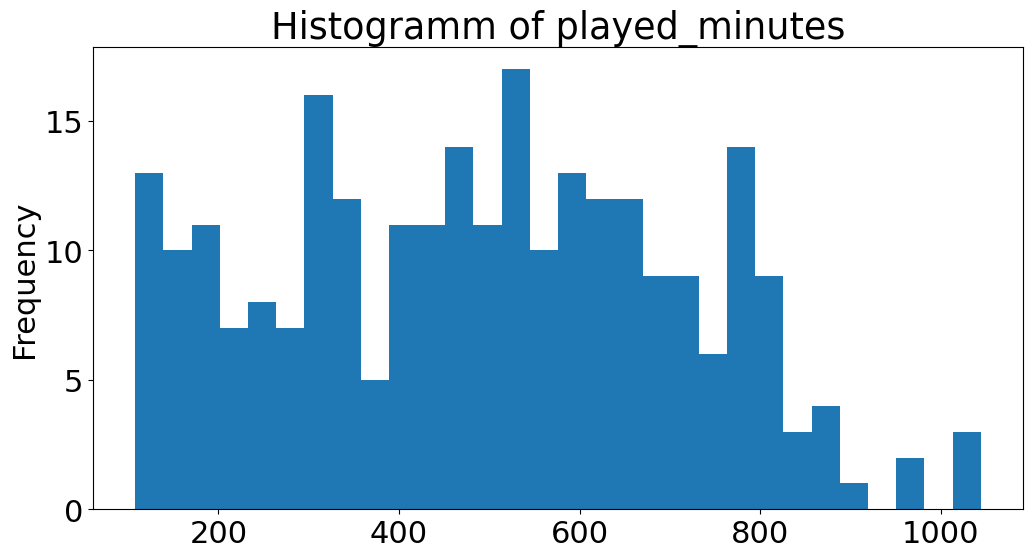

In [16]:
#%% Histogramm of minutes (or matches) played
plt.figure(figsize = (12,6))
plt.title('Histogramm of ' + str(var_to_avg))
df_gb_id[var_to_avg].plot(kind = 'hist', bins = 30)

We can see that the database includes many players that did not play during the seasons (or very little). These players should not be considered in the clustering analysis :

**Remark** : minutes_min_mask variables is defined in constants_clustering.py module

In a first moment, we are going to consider all the variables in the database.

We can calculate these variables in terms of **minutes played**. We are also going to consider some **"accuracy" features** and the players **position**.

In [17]:
vars_df_stats = original_stats_to_consider[:]
vars_to_avg = vars_df_stats
# insert column with minutes or matches played
vars_df_stats.insert(0,var_to_avg)
# calculate avg values per minute or match
vars_avg = df_gb_id.loc[:,vars_to_avg].apply(calculate_avg, axis = 1)

# vars_avg = df_gb_id.loc[:,vars_df_stats]
# insert column with minutes per match
# vars_avg.insert(0,'avg_min_per_match',mins_per_match_avg)
# insert column with accuracies
vars_avg.insert(np.shape(vars_avg)[1],'%_two_points',accuracy_2pts)
vars_avg.insert(np.shape(vars_avg)[1],'%_three_points',accuracy_3pts)
vars_avg.insert(np.shape(vars_avg)[1],'%_free_throw_points',accuracy_FTpts)
# if FLAG_entropy:
#     vars_avg.insert(np.shape(vars_avg)[1],'entropy',df_gb_id['entropy'])

# vars_avg.insert(np.shape(vars_avg)[1],'position',position_players.astype(int))
df = vars_avg.copy() # mask already applied
if FLAG_stand:
    df = (df - np.mean(df, axis = 0))/np.std(df, axis = 0) # standardize data
elif FLAG_norm:
    df = (df - np.min(df, axis = 0))/(np.max(df, axis = 0) - np.min(df, axis = 0)) # normalize data

## Check the correlation between features

Let's plot the correlation between the variables using a heatmap.

Text(0.5, 1.0, 'Heatmap : Correlation matrix between observed variables')

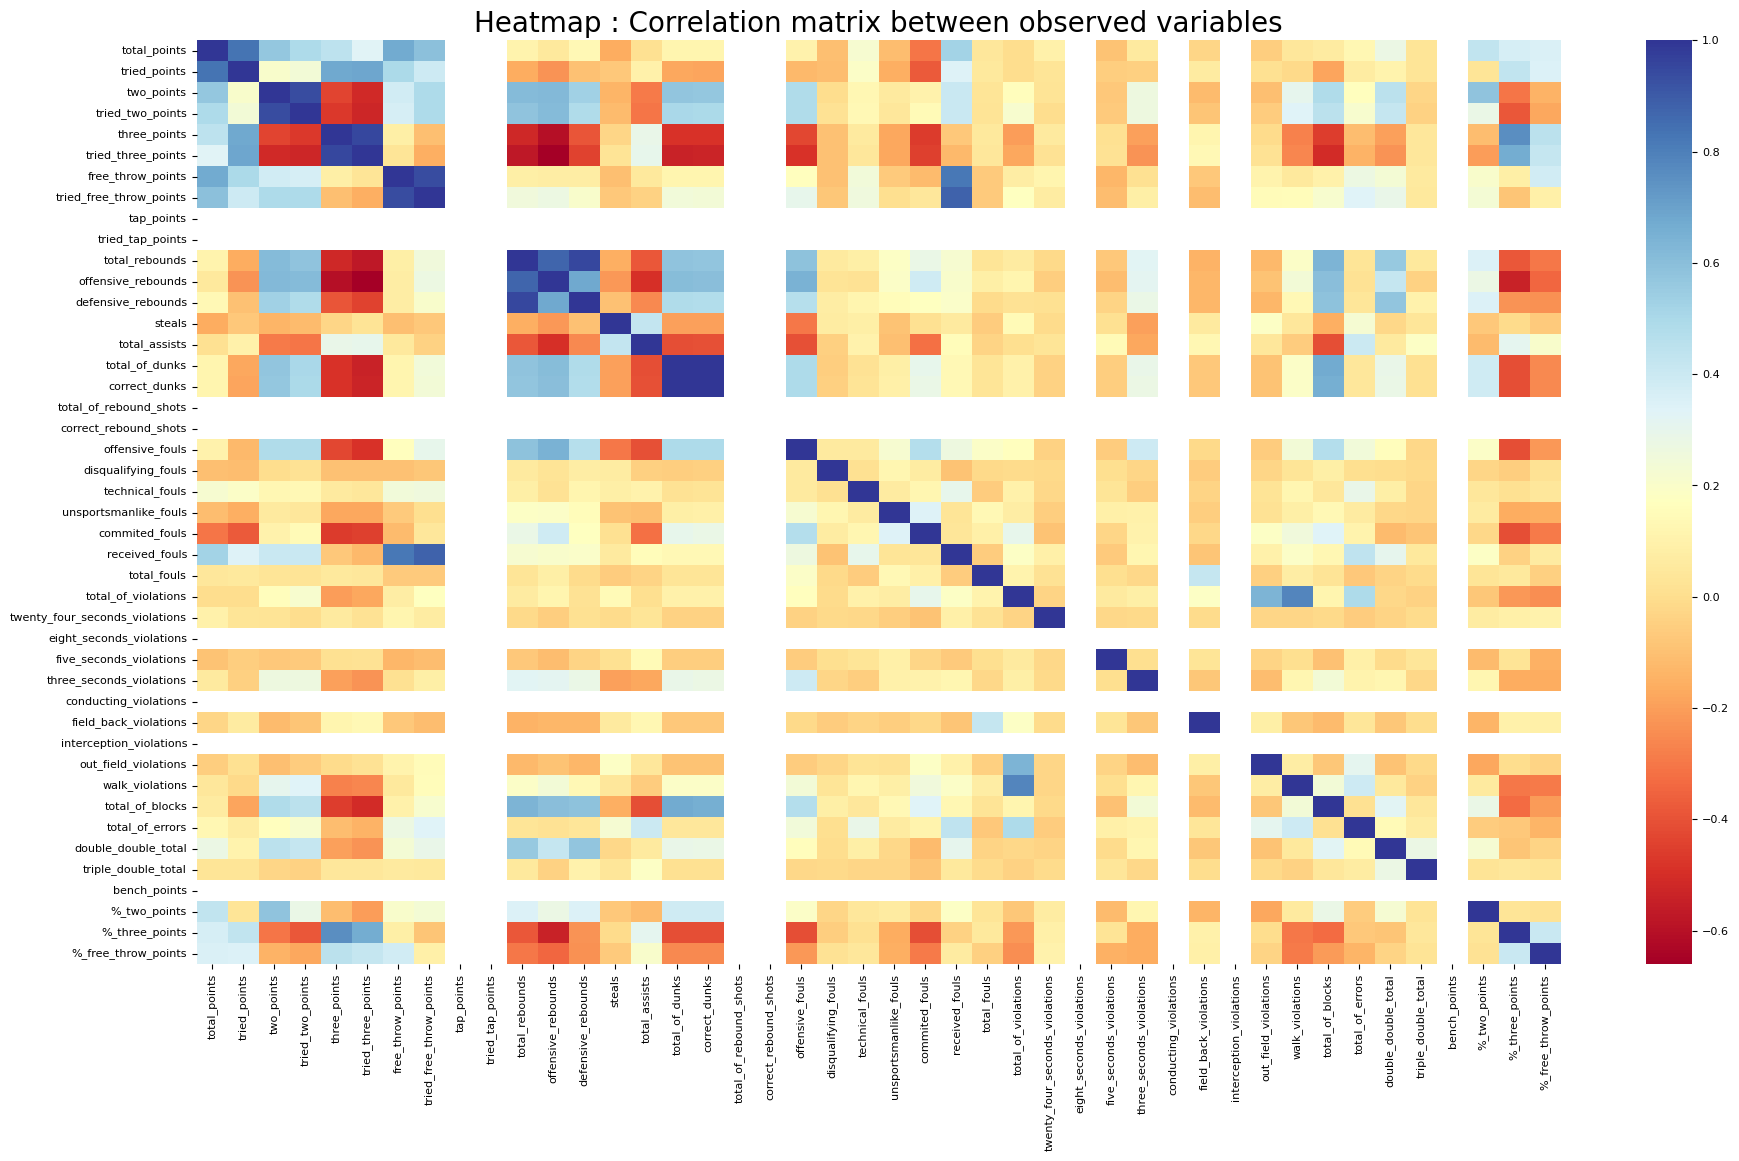

In [18]:
#%% Calculate and Plot correlation matrix
mpl.rcParams.update({'font.size': 8})
plt.figure(figsize=(22,12))
c= df.corr()
sns.heatmap(c, cmap = 'RdYlBu')
plt.savefig('correlation_matrix.png')
plt.title('Heatmap : Correlation matrix between observed variables', fontsize = 20)

We can see some interesting relationships between variables :
    - correct throws x wrong throws : negative correlation
    - correct dunks x dunk points : perfect correlation (as expected)
    - ...

In [19]:
mpl.rcParams.update({'font.size': 14}) # reset original value for font size

#### Clean data - removing NaNs and Std = 0

Number of players : 260
32
(36, 36)


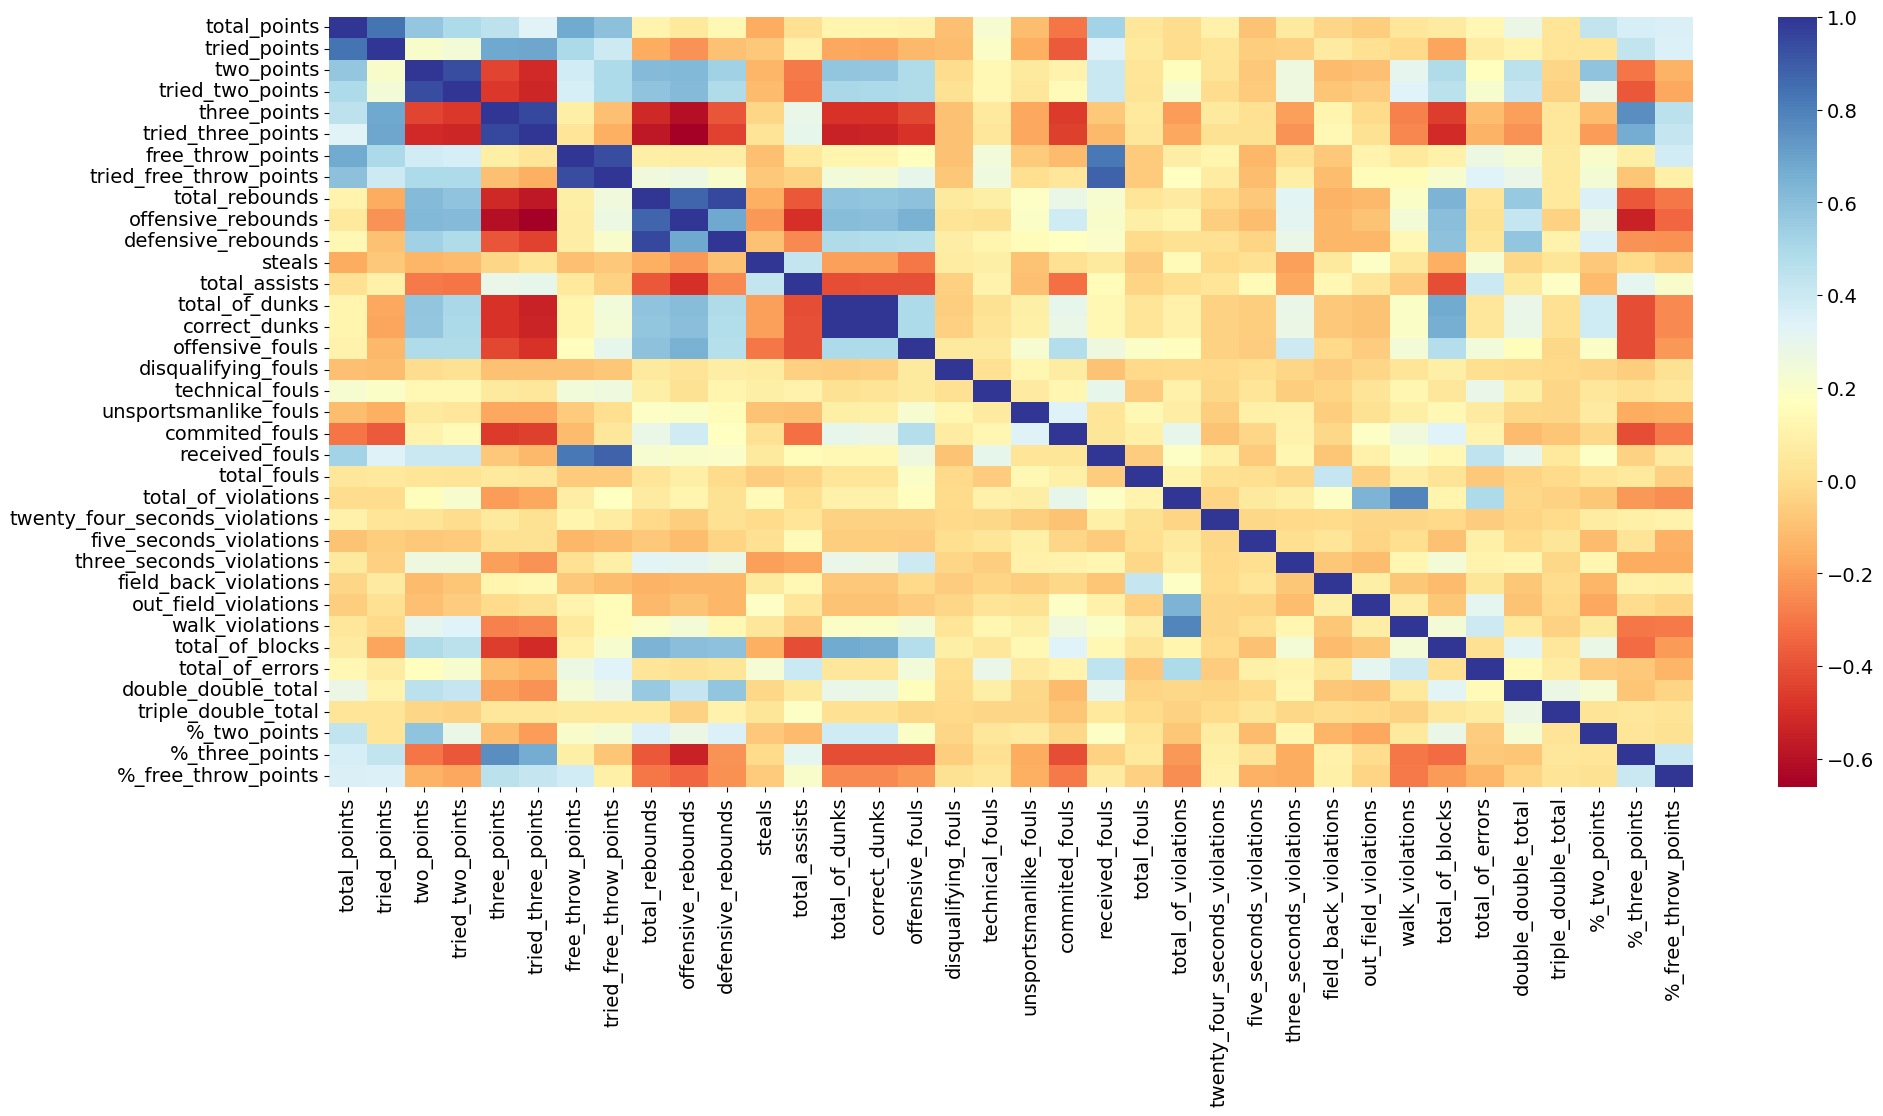

In [20]:
# x = df.dropna(axis = 1)
# drop NaN values from dataset
df_ = df.dropna(inplace = False, axis = 1)
# exclude features with std = 0
non_zero_std = df_.std()!=0
# x = df_.loc[:,non_zero_std]
x = df_.copy()
print('Number of players : {}'.format(len(x)))
plt.figure(figsize=(22,10))
c= x.corr()
sns.heatmap(c, cmap = 'RdYlBu')
print(np.linalg.matrix_rank(c))
print(np.shape(c))

### Detecting and removing outliers...

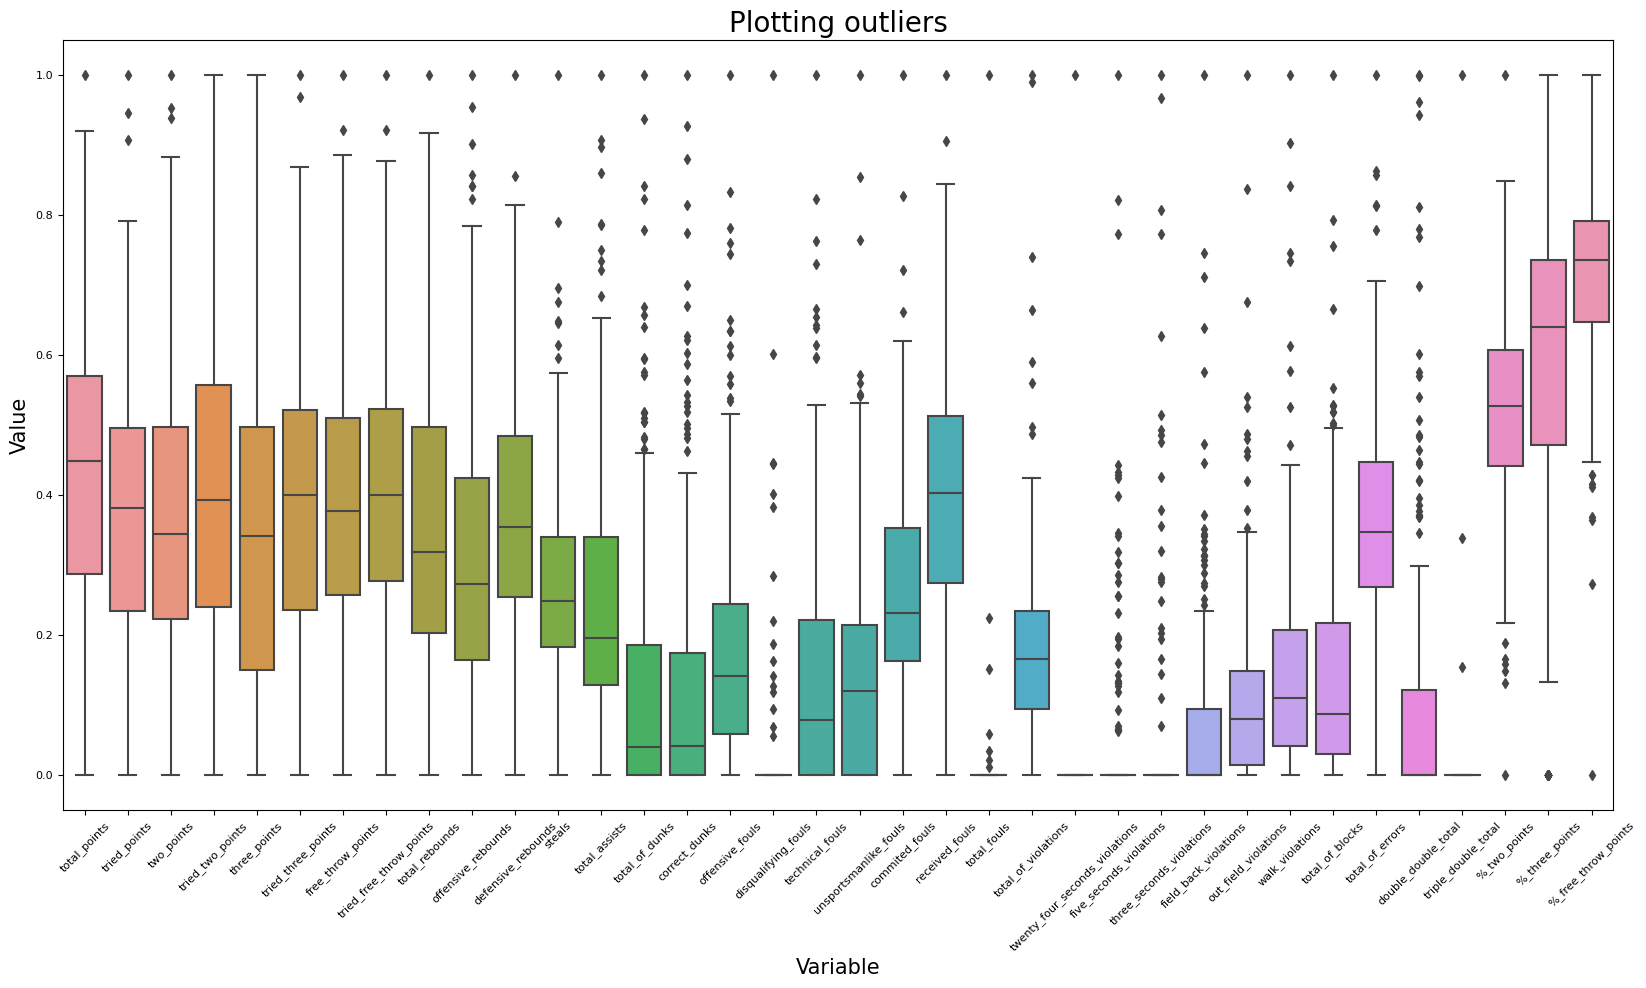

In [21]:
mpl.rcParams.update({'font.size': 8})
plt.figure(figsize = (20,10))
boxplt = sns.boxplot(x="variable", y="value", data=pd.melt(x))
boxplt.set_xticklabels(boxplt.get_xticklabels(),rotation=45)
boxplt.set_title('Plotting outliers', fontsize = 20)
boxplt.set_xlabel('Variable', fontsize = 15)
boxplt.set_ylabel('Value', fontsize = 15)
plt.show()

In [22]:
# Q1 = x.quantile(0.25)
# Q3 = x.quantile(0.75)
# IQR = Q3 - Q1
# IQR_mult = 1.5
# outliers = (x < (Q1 - IQR_mult * IQR)) |(x > (Q3 + IQR_mult * IQR))
# print('Number of players before removing outliers : {}'.format(len(x)))
# sum_columns_out = outliers.values.sum(axis = 1)
# pl_outliers_bool = sum_columns_out >= 2
# # pl_outliers_bool = outliers.any(axis=1)

# df_out = x[~pl_outliers_bool] 
# print('Number of players after removing outliers : {}'.format(len(df_out)))
# print('Removed : {} ({}%)'.format(len(x) - len(df_out),round(100*(len(x) - len(df_out))/len(x))))

# df_out = (df_out - np.mean(df_out, axis = 0))/np.std(df_out, axis = 0)
# df_out.dropna(inplace = True, axis = 1)
# non_zero_std_out = df_out.std()!=0
# x_out = df_out.loc[:,non_zero_std_out]

In [23]:
# if FLAG_outlier == True:
#     x = x_out

In [24]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# identify outliers in the training dataset
# iso = IsolationForest(contamination=0.05)
# yhat = iso.fit_predict(x)
lof = LocalOutlierFactor(contamination=0.15)
yhat = lof.fit_predict(x)
pl_outliers_bool = yhat == -1

df_out = x[~pl_outliers_bool] 
print('Number of players before removing outliers : {}'.format(len(x)))
print('Number of players after removing outliers : {}'.format(len(df_out)))
print('Removed : {} ({}%)'.format(len(x) - len(df_out),round(100*(len(x) - len(df_out))/len(x))))


if FLAG_stand:
    df_out = (df_out - np.mean(df_out, axis = 0))/np.std(df_out, axis = 0) # standardize data
elif FLAG_norm:
    df_out = (df_out - np.min(df_out, axis = 0))/(np.max(df_out, axis = 0) - np.min(df_out, axis = 0)) # normalize data
df_out.dropna(inplace = True, axis = 1)
non_zero_std_out = df_out.std()!=0
x_out = df_out.loc[:,non_zero_std_out]

Number of players before removing outliers : 260
Number of players after removing outliers : 221
Removed : 39 (15%)


In [25]:
if FLAG_outlier == True:
    x = x_out

## Factor Analysis

#### Test Factor Analysis adequacy

With KMO :

In [26]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x)
print(kmo_model)

0.6883428535839972


c:\Users\eduar\OneDrive\Área de Trabalho\Sports Power AI\Flamengo\Previsão\Clustering\.venv\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


With Bartlett :

In [27]:
# from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
# chi_square_value,p_value=calculate_bartlett_sphericity(x)
# chi_square_value, p_value

In [28]:
print(np.linalg.matrix_rank(x))

32


In [29]:
fa = FactorAnalyzer() # define model
fa.fit(x, 10) # fit model

FactorAnalyzer(rotation_kwargs={})

### Get Eigen values and plot them

Text(0.5, 1.0, 'Eigenvalues calculated for each factor')

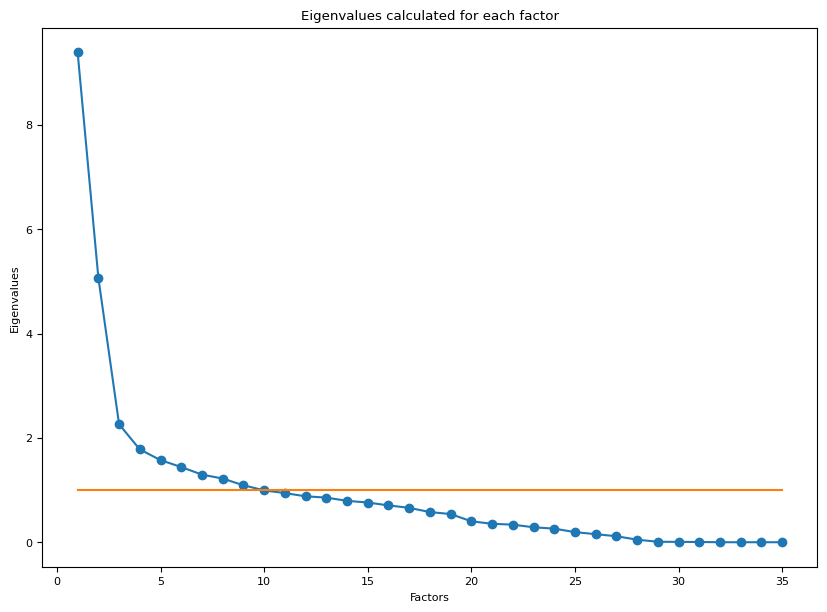

In [30]:
# Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
plt.figure(figsize = (10,7))
plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),np.repeat(1,x.shape[1]))
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues calculated for each factor')

In [31]:
n_factors = 10
fa = FactorAnalyzer(n_factors = n_factors, rotation = 'varimax', method = 'minres') # define model
fa.fit(x) # fit model
loads = fa.loadings_
# print(loads)

In [32]:
mpl.rcParams.update({'font.size': 10})
df_loads = pd.DataFrame(loads, index = x.columns.values, \
                         columns = ['Factor'+str(k) for k in range(1,np.shape(fa.get_factor_variance())[1]+1)])

#### Get idea of Factor names

In [33]:
# factor_names = 'F_' + df_loads.idxmax() + '_' + df_loads.idxmin()
# df_loads.columns = factor_names

(35, 10)


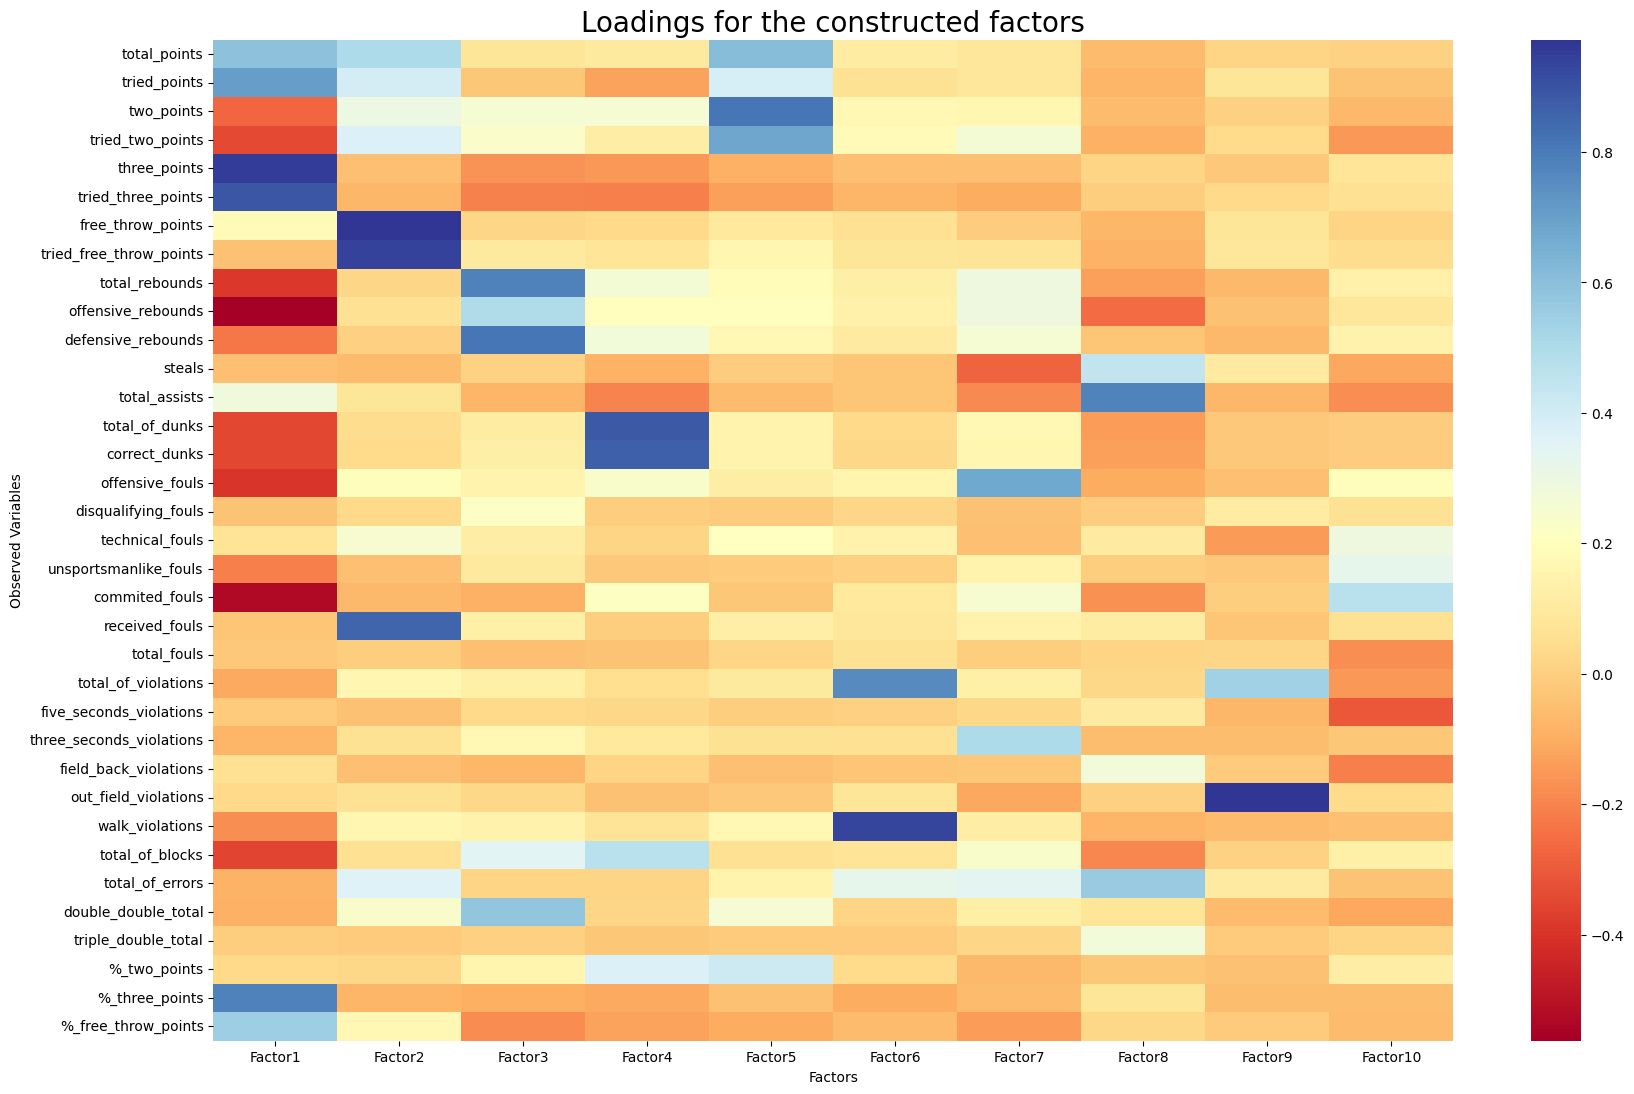

In [34]:
plt.figure(figsize = (20,13))
sns.heatmap(df_loads,cmap = 'RdYlBu')
plt.xlabel('Factors')
plt.ylabel('Observed Variables')
plt.title('Loadings for the constructed factors', fontsize = 20)
print(np.shape(loads))

In [35]:
pd.DataFrame(fa.get_communalities(), index = x.columns).T

total_points  tried_points  two_points  tried_two_points  three_points   
0      1.014693      0.842339    1.020198          0.918125      0.980104  \

   tried_three_points  free_throw_points  tried_free_throw_points   
0            0.928721           0.998106                  0.95413  \

   total_rebounds  offensive_rebounds  ...  field_back_violations   
0        1.007763            0.825588  ...               0.136362  \

   out_field_violations  walk_violations  total_of_blocks  total_of_errors   
0              0.975978         1.000661         0.590312         0.706962  \

   double_double_total  triple_double_total  %_two_points  %_three_points   
0             0.506749             0.078484      0.352277         0.67413  \

   %_free_throw_points  
0             0.417098  

[1 rows x 35 columns]

In [36]:
pd.DataFrame(fa.get_factor_variance(), index = ['SS Loadings','Proportion Var', 'Cumulative Var'], \
             columns = ['Factor'+str(k) for k in range(1,np.shape(fa.get_factor_variance())[1]+1)])

Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   
SS Loadings     5.231962  3.618800  2.481122  2.455579  2.244908  1.781083  \
Proportion Var  0.149485  0.103394  0.070889  0.070159  0.064140  0.050888   
Cumulative Var  0.149485  0.252879  0.323768  0.393928  0.458068  0.508956   

                 Factor7   Factor8   Factor9  Factor10  
SS Loadings     1.598195  1.565996  1.355083  0.840000  
Proportion Var  0.045663  0.044743  0.038717  0.024000  
Cumulative Var  0.554619  0.599361  0.638078  0.662078

In [37]:
# struct = fa.structure_
# pd.DataFrame(struct)
np.linalg.solve(fa.corr_, fa.loadings_)
# fa.loadings_

array([[-3.79958574e+13,  1.14128192e+13, -4.66837696e+13,
        -1.95234715e+13,  2.52509041e+13,  7.61436973e+13,
        -1.72358510e+14, -5.31080618e+13, -3.78349246e+12,
         1.69918503e+14],
       [-9.94836800e+13, -1.02481200e+13, -9.06891212e+13,
         3.95263932e+13, -6.67078982e+13, -7.05117874e+12,
         1.98477407e+12,  7.01611128e+13, -2.76802800e+13,
        -8.39930015e+13],
       [ 3.05434408e+13, -9.17433615e+12,  3.75273267e+13,
         1.56941845e+13, -2.02982522e+13, -6.12090546e+13,
         1.38552524e+14,  4.26915736e+13,  3.04140730e+12,
        -1.36591094e+14],
       [ 7.46062109e+13,  7.68541534e+12,  6.80108707e+13,
        -2.96421928e+13,  5.00265321e+13,  5.28791986e+12,
        -1.48844989e+12, -5.26162158e+13,  2.07583878e+13,
         6.29892217e+13],
       [ 2.98578163e+13, -8.96839503e+12,  3.66849312e+13,
         1.53418889e+13, -1.98426067e+13, -5.98350630e+13,
         1.35442363e+14,  4.17332535e+13,  2.97313524e+12,
        -1.

In [38]:
x

total_points  tried_points  two_points  tried_two_points  three_points   
0        0.311161      0.299273    0.147102          0.131846      0.641498  \
1        0.634455      0.539937    0.563811          0.497934      0.503079   
2        0.592422      0.387367    0.828711          0.792432      0.008551   
3        0.283920      0.339938    0.298931          0.419554      0.351377   
4        0.225616      0.056863    0.436433          0.415951      0.000000   
..            ...           ...         ...               ...           ...   
253      0.367388      0.323333    0.299871          0.346694      0.420569   
254      0.614781      0.555701    0.765968          0.890854      0.000000   
256      0.842813      0.790796    0.780291          0.755919      0.648362   
257      1.000000      1.000000    0.746184          0.820415      0.752939   
258      0.148482      0.246315    0.000000          0.059188      0.391767   

     tried_three_points  free_throw_points  tried_free_throw_points   
0              0.561491           0.149323                 0.160795  \
1              0.484785           0.424294                 0.406636   
2              0.041198           0.532059                 0.593927   
3              0.380701           0.213020                 0.179483   
4              0.000000           0.323246                 0.450598   
..                  ...                ...                      ...   
253            0.367420           0.358558                 0.379255   
254            0.049152           0.779480                 1.000000   
256            0.584408           0.299662                 0.330793   
257            0.675584           0.711459                 0.690755   
258            0.505608           0.443093                 0.368674   

     total_rebounds  offensive_rebounds  ...  field_back_violations   
0          0.359988            0.434258  ...               0.000000  \
1          0.308589            0.236885  ...               0.046404   
2          0.667329            0.656704  ...               0.000000   
3          0.175956            0.166584  ...               0.000000   
4          0.643469            0.734550  ...               0.000000   
..              ...                 ...  ...                    ...   
253        0.652977            0.336465  ...               0.522216   
254        0.861568            0.914071  ...               0.000000   
256        0.411377            0.345803  ...               0.000000   
257        0.440220            0.408750  ...               0.000000   
258        0.134238            0.235067  ...               0.000000   

     out_field_violations  walk_violations  total_of_blocks  total_of_errors   
0                0.148853         0.047301         0.061399         0.255770  \
1                0.218030         0.022045         0.066768         0.435284   
2                0.471641         0.196710         0.184410         0.798499   
3                0.269189         0.199595         0.064770         0.234458   
4                0.000000         0.118334         0.070401         0.435076   
..                    ...              ...              ...              ...   
253              0.223059         0.000000         0.322026         0.519608   
254              0.000000         0.365069         0.552852         0.299094   
256              0.638624         0.355139         0.307323         0.458655   
257              0.556223         0.000000         0.000000         0.653589   
258              0.000000         0.000000         0.162485         0.360889   

     double_double_total  triple_double_total  %_two_points  %_three_points   
0               0.000000                  0.0      0.514120        0.842560  \
1               0.000000                  0.0      0.766752        0.765306   
2               0.370155                  0.0      0.733501        0.153061   
3               0.000000                  0.0      0.341807        0.6806

In [48]:
np.shape(fa.transform(x))
fa.transform(x)[0]

array([ 0.22431232, -1.03231365, -0.37569124,  0.15215026, -1.05313598,
       -0.08489172, -0.16980134, -0.70950463, -0.2753193 ,  1.17135447])

In [39]:
new_variables, X_scale, weights = fa.transform(x)
df_new = pd.DataFrame(new_variables,\
             columns = ['Factor'+str(k) for k in range(1,np.shape(fa.get_factor_variance())[1]+1)],\
             index = x.index)
if FLAG_dot:
    df_new = pd.DataFrame( np.dot(x,loads),\
                 columns = ['Factor'+str(k) for k in range(1,np.shape(fa.get_factor_variance())[1]+1)],\
                 index = x.index)

ValueError: too many values to unpack (expected 3)

In [ ]:
if FLAG_entropy:
    entr_ = df_gb_id['entropy'].loc[~pl_outliers_bool]
    entr_norm = (entr_ - np.min(entr_, axis=0))/(np.max(entr_, axis=0) - np.min(entr_, axis=0))
    nb_matches_ = df_gb_id['played_matches'].loc[~pl_outliers_bool]
    nb_matches_norm = (nb_matches_ - np.min(nb_matches_, axis=0))/(np.max(nb_matches_, axis=0) - np.min(nb_matches_, axis=0))
#     df_new.insert(np.shape(df_new)[1],'Entropy',entr_)


In [ ]:
if FLAG_stand:
    df_new_scale = (df_new - np.mean(df_new, axis=0)) / np.std(df_new, axis=0) # standardize dat
else:
    df_new_scale = df_new
#     df_new_scale = (df_new - np.min(df_new, axis = 0))/(np.max(df_new, axis = 0) - np.min(df_new, axis = 0)) # normalize data
# df_new_scale
# np.min(df_new_scale)

## Clustering analysis

We are going to use the Agglomerative Hierarchical method.

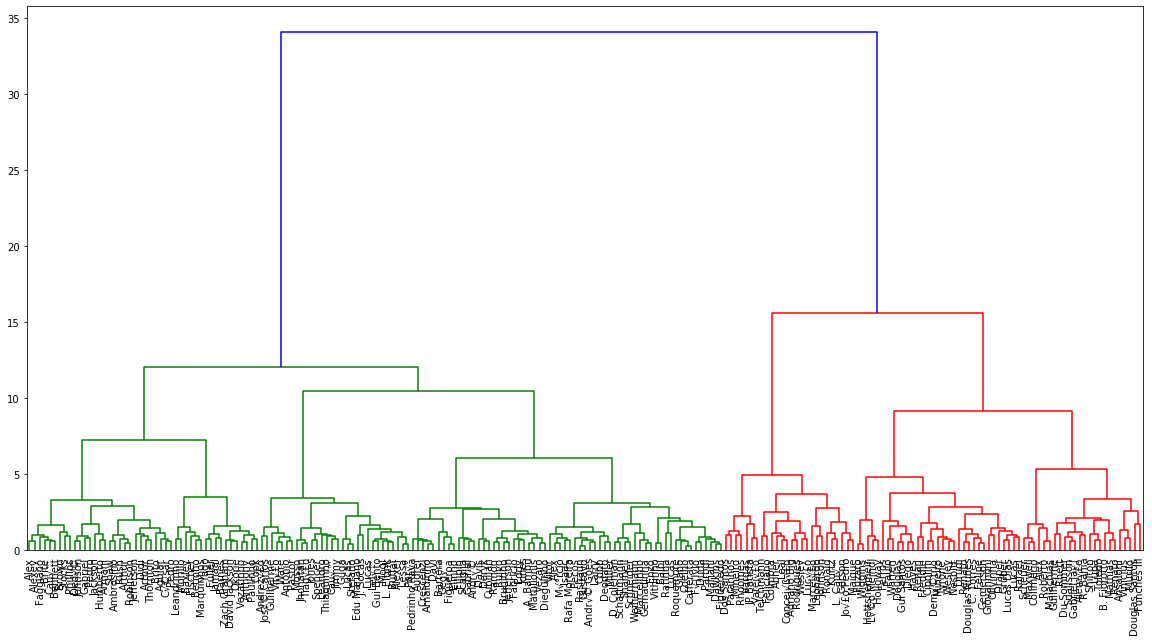

In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch

nicknames_all = df_gb_id['athlete_id'].apply(get_info_from_id, args = ('nickname',))
if FLAG_outlier == True:
    nicknames = df_gb_id['athlete_id'][~pl_outliers_bool].apply(get_info_from_id, args = ('nickname',))

X = df_new_scale.iloc[:,:]
link = 'ward'
plt.figure(figsize = (20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method=link),leaf_font_size = 10, labels = nicknames.values)
# plt.ylim(0,10)

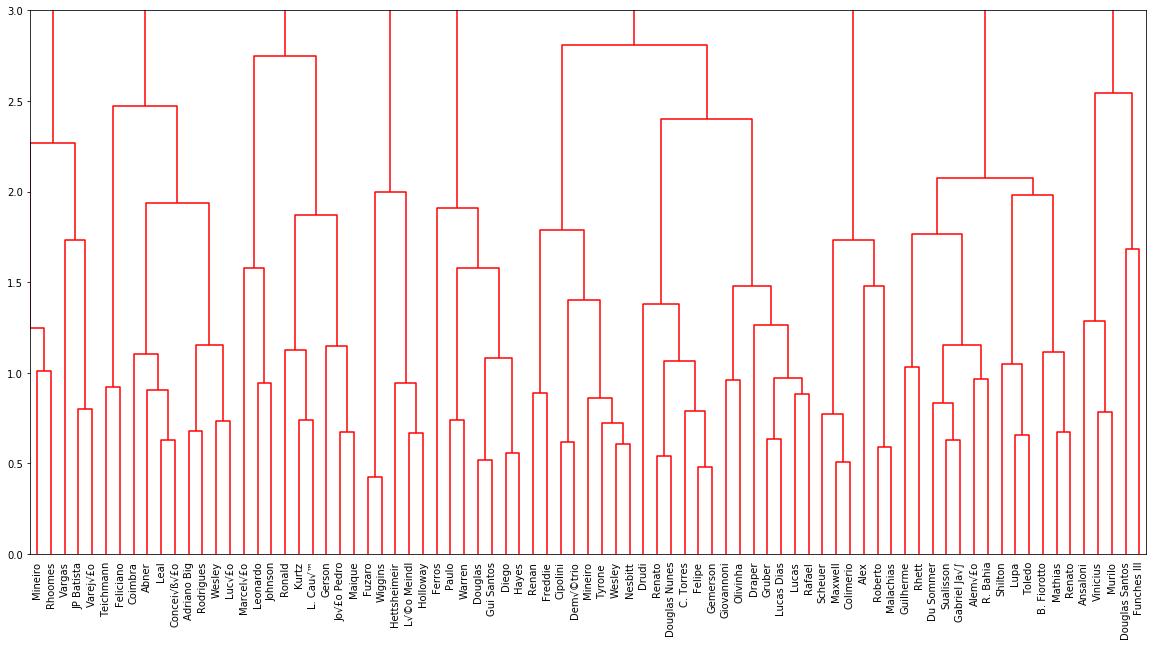

In [ ]:
%matplotlib inline
# X.index = nicknames.values
# X=X.drop('Factor8', axis = 1)
# X = df_.loc[:,non_zero_std]
# X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
plt.figure(figsize = (20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method=link),leaf_font_size = 10, labels = nicknames.values)
plt.ylim(0,3)
plt.xlim(1400,2210)
plt.savefig('dendro.png')

In [ ]:
# import plotly.figure_factory as ff

# # X = np.random.rand(15, 12) # 15 samples, with 12 dimensions each
# # plt.figure(figsize = (20,10))
# fig = ff.create_dendrogram(X, hovertext= list(nicknames),)
# fig.update_layout(width=2000, height=800)
# fig.update_layout(
#     xaxis = dict(
#         dtick = 0.25
#     )
# )

# fig.update_layout(
#                     plot_bgcolor = 'white',
#                     paper_bgcolor = 'white'
# )
# fig.show()

In [ ]:
# dendrogram['leaves']

In [ ]:
dendrogram['dcoord'][0]

[0.0, 0.5883341906723796, 0.5883341906723796, 0.0]

In [ ]:
nb_clusters = 12

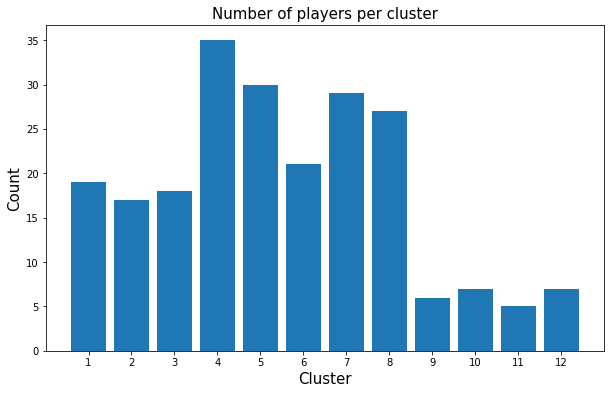

In [ ]:
%matplotlib inline
model = AgglomerativeClustering(n_clusters=nb_clusters, affinity='euclidean', linkage=link)
# model = KMeans(n_clusters=nb_clusters)
model.fit(X)
labels = model.labels_ + 1
unique, counts = np.unique(labels, return_counts=True)
# unique += 1
plt.figure(figsize = (10,6))
plt.bar(unique.astype(str), height=counts)
# plt.hist(labels.astype(str))
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Number of players per cluster', fontsize = 15)
plt.savefig('hist_cluster.png')
plt.show()


In [ ]:
means_clusters = pd.DataFrame([np.mean(X.iloc[labels==k, :], axis = 0) for k in range(1,nb_clusters+1)])
std_clusters = pd.DataFrame([np.std(X.iloc[labels==k, :], axis = 0) for k in range(1,nb_clusters+1)])

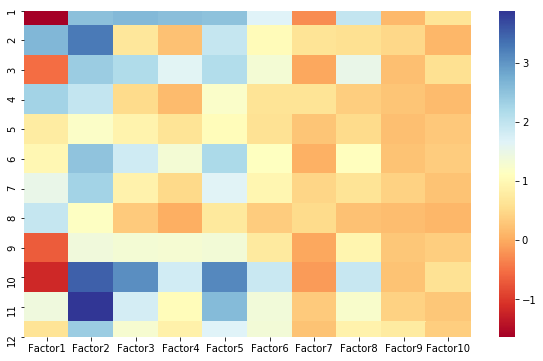

In [ ]:
%matplotlib inline
plt.figure(figsize = (10,6))
g = sns.heatmap(means_clusters, cmap = 'RdYlBu')
g.set(yticklabels=np.arange(1,nb_clusters+1))
plt.show()

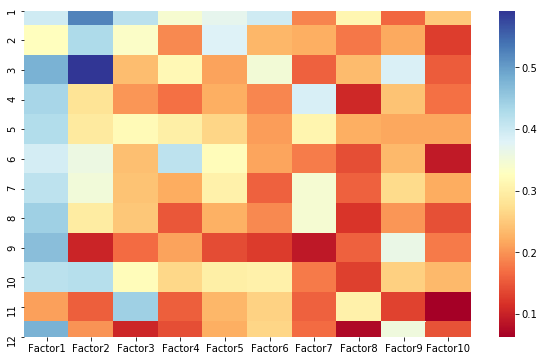

In [ ]:
%matplotlib inline
plt.figure(figsize = (10,6))
g = sns.heatmap(std_clusters, cmap = 'RdYlBu')
g.set(yticklabels=np.arange(1,nb_clusters+1))
plt.show()

### Adding explicativate variables - nickname, position, team, entropy, efficiency,  plus minus,..

In [ ]:
# nicknames_all = df_gb_id['athlete_id'].apply(get_info_from_id, args = ('nickname',))
id_all = df_gb_id['athlete_id']
positions_all = df_gb_id['athlete_id'].apply(get_info_from_id, args = ('position',))
height_all = df_gb_id['athlete_id'].apply(get_info_from_id, args = ('height',))
weight_all = df_gb_id['athlete_id'].apply(get_info_from_id, args = ('weight',))
teams_all = df_gb_id['athlete_id'].apply(get_team_from_id, args = ('last_team_acronym',))
positions_name_all = np.array([names_positions[position] for position in positions_all.values])
efficiency_all = df_gb_id['efficiency']
plus_minus_all = df_gb_id['plus_minus']
time_all = df_gb_id['played_minutes']
if FLAG_outlier == True:
#     nicknames = df_gb_id['athlete_id'][~pl_outliers_bool].apply(get_info_from_id, args = ('nickname',))
    id_ = id_all[~pl_outliers_bool]
    positions = df_gb_id['athlete_id'][~pl_outliers_bool].apply(get_info_from_id, args = ('position',))
    teams = df_gb_id['athlete_id'][~pl_outliers_bool].apply(get_team_from_id, args = ('last_team_acronym',))
    positions_name = positions_name_all[~pl_outliers_bool]
    efficiency = efficiency_all[~pl_outliers_bool]
    plus_minus = plus_minus_all[~pl_outliers_bool]
    height = height_all[~pl_outliers_bool]
    weight = weight_all[~pl_outliers_bool]
    time = time_all[~pl_outliers_bool]
    
else:
    id_ = id_all
    nicknames = nicknames_all
    positions = positions_all
    positions_name = positions_name_all
    teams = teams_all
    efficiency = efficiency_all
    plus_minus = plus_minus_all
    height = height_all
    weight = weight_all
    time = time_all

X_named = X.copy()
X_named.insert(0,'cluster',labels)
X_named.insert(np.shape(X_named)[1],'nickname',np.array(nicknames))
X_named.insert(np.shape(X_named)[1],'id',id_)
X_named.insert(np.shape(X_named)[1],'position',np.array(positions))
X_named.insert(np.shape(X_named)[1],'position_name',np.array(positions_name))
X_named.insert(np.shape(X_named)[1],'height',np.array(height))
X_named.insert(np.shape(X_named)[1],'weight',np.array(weight))
X_named.insert(np.shape(X_named)[1],'IC-Time',entr_norm)
X_named.insert(np.shape(X_named)[1],'IC-Adversarios',nb_matches_norm)
X_named.insert(np.shape(X_named)[1],'team',np.array(teams))
X_named.insert(np.shape(X_named)[1],'+/-',plus_minus)
X_named.insert(np.shape(X_named)[1],'Efficiencia',efficiency)
X_named.insert(np.shape(X_named)[1],'Minutes played',time)
X_named

cluster   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6  \
0          5  1.568711  1.163973  0.793597  0.491862  0.878602  0.448831   
1          7  1.780020  2.377460  0.967580  0.538107  1.909261  0.700976   
2         10 -1.079445  3.304619  2.712262  1.618938  2.855179  1.722482   
3          8  1.436000  1.284759  0.497260  0.171176  1.037458  0.712669   
4          3 -1.381274  2.164061  2.122800  1.525667  1.817556  1.025663   
..       ...       ...       ...       ...       ...       ...       ...   
253        6  0.474786  1.955308  1.721272  1.881257  1.613109  0.839600   
254       10 -1.430539  4.325703  3.361340  2.170145  3.344312  1.883052   
256        6  1.603856  2.742382  1.519026  1.229175  2.712440  1.703531   
257        2  2.629482  3.842885  1.590197  0.431472  2.888485  1.114664   
258        8  1.540639  1.581449  0.119709 -0.113138  0.256742  0.172659   

      Factor7   Factor8   Factor9  ...  position position_name  height  \
0    0.081540  0.591496  0.114789  ...         2           Ala    1.96   
1    0.249200  0.637376  0.255608  ...         2           Ala    1.97   
2   -0.085383  1.895641  0.667628  ...         3          Pivo    2.13   
3    0.173811  0.304469  0.420976  ...         2           Ala    1.95   
4   -0.120104  1.415000 -0.117403  ...         3          Pivo    1.98   
..        ...       ...       ...  ...       ...           ...     ...   
253  0.196530  1.077503  0.221606  ...         2           Ala    1.98   
254 -0.476326  2.013282  0.011009  ...         3          Pivo    2.11   
256  0.008077  1.026019  0.911334  ...         5      Ala/Piv.    2.01   
257  0.499570  0.911388  0.744960  ...         2           Ala    1.97   
258  0.656809  0.236822  0.012535  ...         1       Armador    1.94   

     weight   IC-Time  IC-Adversarios  team         +/-  Efficiencia  \
0      92.0  0.526489        0.765625   FLA  170.500000   205.333333   
1      91.0  0.264035        0.541667   BSB -112.333333   286.000000   
2     113.0  0.247427        0.500000   SJO  -68.000000   205.000000   
3      94.0  0.347731        0.906250   MIN  -41.000000   205.000000   
4     108.0  0.481479        0.723958   MIN    2.500000   183.833333   
..      ...       ...             ...   ...         ...          ...   
253   105.0  0.420986        0.500000   BOT  -18.000000   148.000000   
254   120.0  0.475769        0.218750   FLA   25.000000   121.000000   
256   100.0  0.149297        0.187500   BAU   -9.000000   184.000000   
257    82.0  0.214160        0.187500   SJO    1.000000   238.000000   
258    85.0  0.415906        0.093750   FLA   15.000000    35.000000   

    Minutes played  
0       567.527778  
1       614.200000  
2       412.994444  
3       814.050000  
4       457.686111  
..             ...  
253     327.466667  
254     221.733333  
256     343.133333  
257     393.966667  
258     111.316667  

[221 rows x 23 columns]

### Clusters in 3D dimension - Factors 1,2 and 3

In [ ]:
import plotly.graph_objects as go

# customdata = np.dstack((X_named['nickname'], X_named['position']))

fig = go.Figure()

for cluster in unique:
    fig.add_trace(go.Scatter3d(
#             x=X_named.loc[labels == cluster, 'IC-Time'],
#             y=X_named.loc[labels == cluster, 'IC-Adversarios'],
#             z=X_named.loc[labels == cluster, 'Factor1'],
            x=X_named.loc[labels == cluster, 'Factor1'],
            y=X_named.loc[labels == cluster, 'Factor2'],
            z=X_named.loc[labels == cluster, 'Factor3'],
            mode='markers',
            marker=dict(
                size=10,
                color= cluster,                # set color to an array/list of desired values
                opacity=0.70
            ),
            name='Cluster ' + str(cluster),
            showlegend=True,
            customdata = np.array(X_named['position_name'][labels == cluster]),
            text=X_named['nickname'][labels == cluster],
            hovertemplate=
            "<b>%{text}</b><br><br>" +
            "position:%{customdata}<br>"))
    
fig.update_layout(scene = dict(
                    xaxis_title='Factor 1',
                    yaxis_title='Factor 2',
                    zaxis_title='Factor 3'),
                    plot_bgcolor = 'white',
                    paper_bgcolor = 'white')


fig.show()

### Parallel coordinates

In [ ]:
color_scale = []
start = 0
colors = ['#6495ED','#FF4500','#00FF7F','#9467bd','#FFA500','#48D1CC','#FA8072','#9ACD32','#FFC0CB','#FFD700',]
for i in range(nb_clusters):
    color_scale.append([round(start,2),colors[i%10]])
    color_scale.append([round(start + 1/(nb_clusters+2),2),colors[i%10]])
    start += 1/(nb_clusters+2)
i = nb_clusters
color_scale.append([round(start,2),'#000000'])
color_scale.append([round(start + 1/(nb_clusters+2),2),'#000000'])
i += 1
start += 1/(nb_clusters+2)
color_scale.append([round(start,2),'#FFFF00'])
color_scale.append([round(start + 1/(nb_clusters+2),2),'#FFFF00'])

In [ ]:
X_parcoords = X_named.copy()
# X_parcoords.insert(0,'cluster',labels)
labels_parcoords = []
# for k in range(n_factors + 1):
#     if k == 0:
#         labels_parcoords.append('Cluster')
#     else:
#         labels_parcoords.append('Factor ' + str(k))
# if FLAG_entropy:
#     labels_parcoords = X_parcoords.columns.values[0:(n_factors + 2)]
# else:
labels_parcoords = X_parcoords.columns.values[0:(n_factors + 1)]
    
X_parcoords

cluster   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6  \
0          5  1.568711  1.163973  0.793597  0.491862  0.878602  0.448831   
1          7  1.780020  2.377460  0.967580  0.538107  1.909261  0.700976   
2         10 -1.079445  3.304619  2.712262  1.618938  2.855179  1.722482   
3          8  1.436000  1.284759  0.497260  0.171176  1.037458  0.712669   
4          3 -1.381274  2.164061  2.122800  1.525667  1.817556  1.025663   
..       ...       ...       ...       ...       ...       ...       ...   
253        6  0.474786  1.955308  1.721272  1.881257  1.613109  0.839600   
254       10 -1.430539  4.325703  3.361340  2.170145  3.344312  1.883052   
256        6  1.603856  2.742382  1.519026  1.229175  2.712440  1.703531   
257        2  2.629482  3.842885  1.590197  0.431472  2.888485  1.114664   
258        8  1.540639  1.581449  0.119709 -0.113138  0.256742  0.172659   

      Factor7   Factor8   Factor9  ...  position position_name  height  \
0    0.081540  0.591496  0.114789  ...         2           Ala    1.96   
1    0.249200  0.637376  0.255608  ...         2           Ala    1.97   
2   -0.085383  1.895641  0.667628  ...         3          Pivo    2.13   
3    0.173811  0.304469  0.420976  ...         2           Ala    1.95   
4   -0.120104  1.415000 -0.117403  ...         3          Pivo    1.98   
..        ...       ...       ...  ...       ...           ...     ...   
253  0.196530  1.077503  0.221606  ...         2           Ala    1.98   
254 -0.476326  2.013282  0.011009  ...         3          Pivo    2.11   
256  0.008077  1.026019  0.911334  ...         5      Ala/Piv.    2.01   
257  0.499570  0.911388  0.744960  ...         2           Ala    1.97   
258  0.656809  0.236822  0.012535  ...         1       Armador    1.94   

     weight   IC-Time  IC-Adversarios  team         +/-  Efficiencia  \
0      92.0  0.526489        0.765625   FLA  170.500000   205.333333   
1      91.0  0.264035        0.541667   BSB -112.333333   286.000000   
2     113.0  0.247427        0.500000   SJO  -68.000000   205.000000   
3      94.0  0.347731        0.906250   MIN  -41.000000   205.000000   
4     108.0  0.481479        0.723958   MIN    2.500000   183.833333   
..      ...       ...             ...   ...         ...          ...   
253   105.0  0.420986        0.500000   BOT  -18.000000   148.000000   
254   120.0  0.475769        0.218750   FLA   25.000000   121.000000   
256   100.0  0.149297        0.187500   BAU   -9.000000   184.000000   
257    82.0  0.214160        0.187500   SJO    1.000000   238.000000   
258    85.0  0.415906        0.093750   FLA   15.000000    35.000000   

    Minutes played  
0       567.527778  
1       614.200000  
2       412.994444  
3       814.050000  
4       457.686111  
..             ...  
253     327.466667  
254     221.733333  
256     343.133333  
257     393.966667  
258     111.316667  

[221 rows x 23 columns]

In [ ]:
means_clusters_pcor = means_clusters.reset_index()
means_clusters_pcor = means_clusters_pcor.rename(columns={"index": "cluster"})
means_clusters_pcor['cluster'] += 1
labels_pcor = np.concatenate((labels,np.repeat(nb_clusters+1,len(means_clusters_pcor['cluster']))))
labels_pcor = np.concatenate((labels_pcor,np.array([nb_clusters+2])))
mean_pop = pd.DataFrame(np.mean(X_parcoords,axis = 0)).T
mean_pop['cluster'] = nb_clusters+2
X_parcoords_test = pd.concat([X_parcoords,means_clusters_pcor,mean_pop])

C:\Users\Pedro R. Suanno\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [ ]:
plt.figure(figsize = (22,10))
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = labels_pcor,
                    showscale = True,
                    colorscale = color_scale),
        dimensions = [dict(label = labels_parcoords[k], values = X_parcoords_test.loc[:,labels_parcoords[k]]) for k in range(len(labels_parcoords))]
    )
)

fig.update_layout(
                    plot_bgcolor = 'white',
                    paper_bgcolor = 'white'
)

fig.show()

<Figure size 1584x720 with 0 Axes>

#### Analyzing a specific player 

In [ ]:
player_nickname = ['Leandrinho','Hettsheimeir','Marquinhos']
player_idx = df_gb_id[~pl_outliers_bool].loc[X_parcoords['nickname'].isin(player_nickname)].index
X_parcoords.loc[player_idx,:]
# print(player_idx)

cluster   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6  \
47         2  2.783061  3.667202  1.072096  0.670210  2.193775  1.039445   
75         2  2.234945  3.936035  1.204656  0.472709  2.694463  1.266650   
152       11  1.521045  4.127321  2.159489  1.321800  2.787068  1.699477   

      Factor7   Factor8   Factor9  ...  position position_name  height  \
47   0.501580  0.705023  0.546085  ...         2           Ala    2.07   
75   0.782979  0.891958  0.430887  ...         4      Ala/Arm.    1.92   
152  0.117716  1.706309  0.288864  ...         3          Pivo    2.08   

     weight   IC-Time  IC-Adversarios  team         +/-  Efficiencia  \
47    102.0  0.374077        0.718750   FLA  287.500000   487.500000   
75     91.0  0.377535        0.333333   MIN   33.333333   310.666667   
152   125.0  0.074577        0.562500   FRA   54.333333   299.500000   

    Minutes played  
47      849.236111  
75      531.502778  
152     553.486111  

[3 rows x 23 columns]

### Get positions of players in each cluster

In [ ]:
data_positions = pd.DataFrame({'position' :positions, 'cluster' : labels, 'nickname' : nicknames})
data_count = data_positions.groupby(['cluster','position']).count()
data_count = data_count.reset_index(drop=False)
#calculate position percentage in each cluster
for i in range(1,nb_clusters + 1):
    data_count['nickname'][data_count['cluster']==i] = data_count['nickname'][data_count['cluster']==i]/counts[i-1]

#### Repeating plots for analysis

(34, 10)


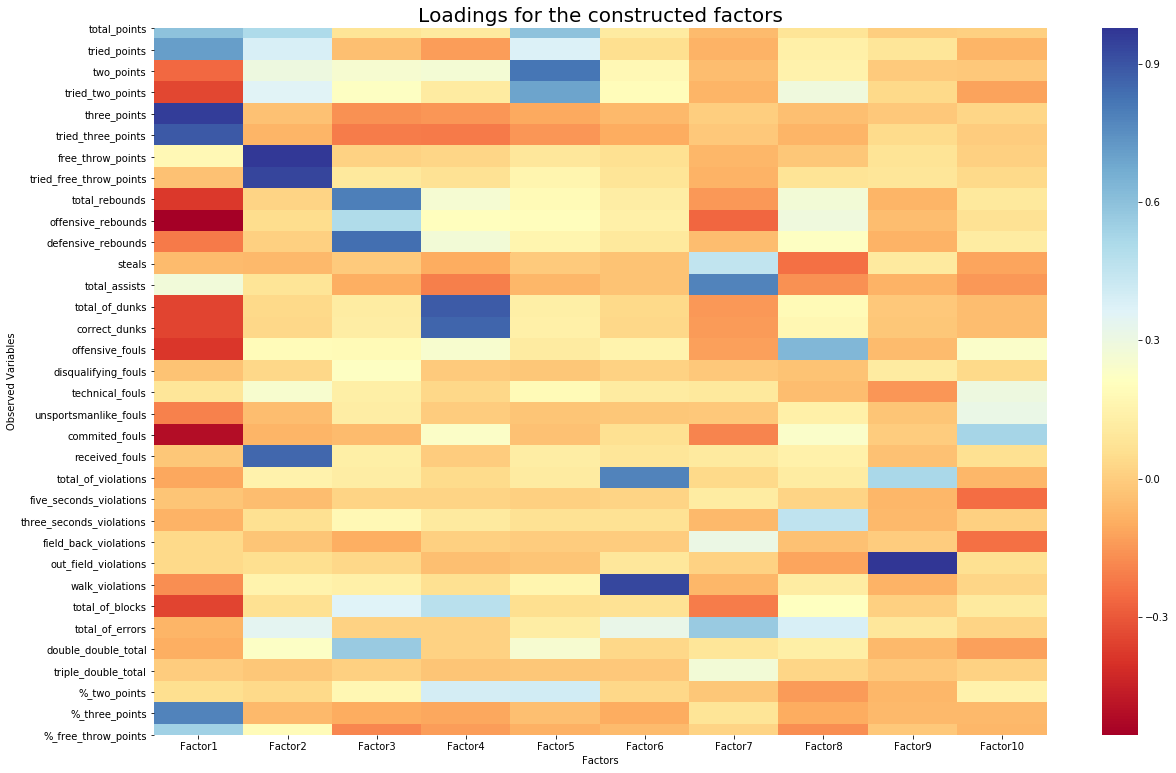

In [ ]:
mpl.rcParams.update({'font.size': 10})
plt.figure(figsize = (20,13))
sns.heatmap(df_loads,cmap = 'RdYlBu')
plt.xlabel('Factors')
plt.ylabel('Observed Variables')
plt.title('Loadings for the constructed factors', fontsize = 20)
print(np.shape(loads))

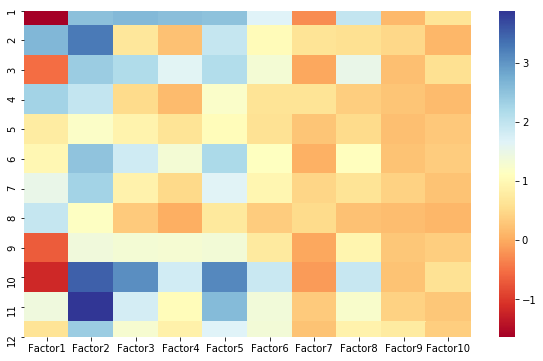

In [ ]:
%matplotlib inline
plt.figure(figsize = (10,6))
g = sns.heatmap(means_clusters, cmap = 'RdYlBu')
g.set(yticklabels=np.arange(1,nb_clusters+1))
plt.show()

### Who are the outliers ?

In [ ]:
nicknames_all[pl_outliers_bool].head()

23        H√©lio
40    Gustavinho
46       Nezinho
54         Pilar
64         Lucas
Name: athlete_id, dtype: object

In [ ]:
positions_all[pl_outliers_bool].head()

23    1
40    1
46    1
54    2
64    4
Name: athlete_id, dtype: int64

In [ ]:
data_outliers = pd.DataFrame({'position' : positions_all[pl_outliers_bool],'position_name' : positions_name_all[pl_outliers_bool], 'nickname' : nicknames_all[pl_outliers_bool]})
jitter_x = np.random.normal(0,0.1,size = pl_outliers_bool.sum())
# jitter_x = np.zeros(pl_outliers_bool.sum())
jitter_y = 2*np.random.normal(0,10,size = pl_outliers_bool.sum())
data_outliers.insert(np.shape(data_outliers)[1],'jitter_x',np.array(jitter_x) + data_outliers['position'])
data_outliers.insert(np.shape(data_outliers)[1],'jitter_y',np.array(jitter_y))
data_outliers.head()

position position_name    nickname  jitter_x   jitter_y
23         1       Armador      H√©lio  0.990236  -7.519556
40         1       Armador  Gustavinho  1.097466  24.107788
46         1       Armador     Nezinho  1.044715 -19.375177
54         2           Ala       Pilar  1.852731  20.973422
64         4      Ala/Arm.       Lucas  4.143507 -17.077541

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
        x=data_outliers['jitter_x'],
        y=data_outliers['jitter_y'],
        mode='markers',
        marker=dict(
            size=30,
            opacity=0.70
        ),
        showlegend=False,
        customdata = data_outliers['position_name'],
        text=data_outliers['nickname'],
        hovertemplate=
        "<b>%{text}</b><br><br>" +
        "position:%{customdata}<br>"))
    
fig.update_layout(barmode='stack',
                 title="Outliers per position",
                 xaxis=dict(tickmode='linear'),
                 xaxis_title="Position",
                 yaxis_title="Player",
                 legend_title="Position")


fig.show()

In [ ]:
outlier_position, count_outlier_position = np.unique(data_outliers['position'].values, return_counts = True)
count_outlier_position_aux = np.zeros(5)
for k in range(5):
    if k+1 in outlier_position:
        count_outlier_position_aux[k] = count_outlier_position[np.where(outlier_position == k+1)]
count_outlier_position = count_outlier_position_aux        
positions_unique,counts_position = np.unique(positions_all, return_counts=True)
perc_outlier_position = 100*np.divide(count_outlier_position,counts_position)
df_count_outlier_position = pd.DataFrame({'count' : count_outlier_position, 'percentual' : perc_outlier_position})
names_positions_unique = [names_positions[position] for position in positions_unique]

In [ ]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# fig = go.Figure()
fig.add_trace(go.Bar(
    x=names_positions_unique,
    y=df_count_outlier_position['count'],
#         text=round(data_count['nickname'][data_count['position']==position],2),
#     textposition='auto',
    name= 'Nb. of players',
    offsetgroup=1
),
secondary_y=False)

fig.add_trace(go.Bar(
    x=names_positions_unique,
    y=df_count_outlier_position['percentual'],
#         text=round(data_count['nickname'][data_count['position']==position],2),
#     textposition='auto',
    name= 'Percentage of players',
    offsetgroup=2
),
secondary_y=True)

fig.update_layout(barmode='group',
                 title="Number and percentage of outliers per position",
                 xaxis=dict(tickmode='linear'),
                 xaxis_title="Position",
                 legend_title="Position",
                 plot_bgcolor = 'white',
                 paper_bgcolor = 'white',
                 yaxis=dict(
                    title="Number of players"),
                 yaxis2=dict(
                    title="Percentage per position (%)"))
fig.show()

In [ ]:
entr_quantiles = pd.DataFrame(np.quantile(entr_,[0,0.25,0.5,0.75,1]), index = [0,0.25,0.5,0.75,1]).T
entr_norm_quantiles = pd.DataFrame(np.quantile(entr_norm,[0,0.25,0.5,0.75,1]), index = [0,0.25,0.5,0.75,1]).T
entr_quantiles.loc[-1] = np.quantile(entr_norm,[0,0.25,0.5,0.75,1])
entr_quantiles.index = ["entropy", "entropy_normalized"]

In [ ]:
entr_quantiles

0.00      0.25      0.50      0.75      1.00
entropy             2.814186  3.088254  3.161943  3.260015  3.640241
entropy_normalized  0.000000  0.331779  0.420986  0.539708  1.000000

# TJL Analysis - Tempo, jogos e lineup 

In [ ]:
tjl = pd.DataFrame()

tjl['T_quartile'] = pd.qcut(X_named['Minutes played'], 3, ['1','2','3']).astype(int)
tjl['J_quartile'] = pd.qcut(X_named['IC-Adversarios'], 3, ['1','2','3']).astype(int)
tjl['L_quartile'] = pd.qcut(X_named['IC-Time'], 3, ['1','2','3']).astype(int)
tjl['TJL_score'] = tjl[['T_quartile','J_quartile','L_quartile']].sum(axis=1)

In [ ]:
# score = tjl['TJL_score'].max()
score = 8
tjl[tjl['TJL_score']==score].head()

T_quartile  J_quartile  L_quartile  TJL_score
0            2           3           3          8
5            3           3           2          8
7            3           3           2          8
15           3           2           3          8
18           2           3           3          8

In [ ]:
# Define rfm_level function
def tjl_level(df):
    """
    Function to calculate the TJL level
    """
    if df['TJL_score'] >= 9:
        return 'Omnipresent'
    elif ((df['TJL_score'] >= 8) and (df['TJL_score'] < 9)):
        return 'Highly tested'
    elif ((df['TJL_score'] >= 7) and (df['TJL_score'] < 8)):
        return 'Reliable'
    elif ((df['TJL_score'] >= 6) and (df['TJL_score'] < 7)):
        return 'Potential'
    elif ((df['TJL_score'] >= 5) and (df['TJL_score'] < 6)):
        return 'Promising'
    elif ((df['TJL_score'] >= 4) and (df['TJL_score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Biased'

In [ ]:
# nicknames[tjl['TJL_score']==score]
# Create a new variable RFM_Level
tjl['TJL_Level'] = tjl.apply(tjl_level, axis=1)
# Print the header with top 5 rows to the console
tjl.head()

T_quartile  J_quartile  L_quartile  TJL_score      TJL_Level
0           2           3           3          8  Highly tested
1           3           1           1          5      Promising
2           1           1           1          3         Biased
3           3           3           1          7       Reliable
4           2           3           2          7       Reliable

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment
X_parcoords = pd.concat([X_parcoords,tjl], axis = 1)
tjl_level_agg = X_parcoords.groupby('TJL_Level').agg({
    'Minutes played': 'mean',
    'IC-Adversarios': 'mean',
    'IC-Time': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
tjl_level_agg

Minutes played IC-Adversarios IC-Time      
                          mean           mean    mean count
TJL_Level                                                  
Biased                   313.6            0.3     0.3    10
Highly tested            704.0            0.7     0.5    28
Needs Attention          395.9            0.4     0.3    32
Omnipresent              717.0            0.7     0.6     6
Potential                488.0            0.6     0.4    45
Promising                375.6            0.5     0.5    42
Reliable                 638.3            0.7     0.4    58

In [ ]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
df = tjl_level_agg.copy()
# fig = go.Figure()
fig.add_trace(go.Bar(
    x=df.index.values,
    y=df['IC-Time']['count'],
#         text=round(data_count['nickname'][data_count['position']==position],2),
#     textposition='auto',
    name= 'Nb. of players',
    offsetgroup=1
),
secondary_y=False)

# fig.add_trace(go.Bar(
#     x=df.index.values,
#     y=df_count_outlier_position['percentual'],
# #         text=round(data_count['nickname'][data_count['position']==position],2),
# #     textposition='auto',
#     name= 'Percentage of players',
#     offsetgroup=2
# ),
# secondary_y=True)

fig.update_layout(barmode='group',
                 title="Number of players per TJL Level",
                 xaxis=dict(tickmode='linear'),
                 xaxis_title="Position",
                 legend_title="Position",
                 plot_bgcolor = 'white',
                 paper_bgcolor = 'white',
                 yaxis=dict(
                    title="Number of players"))
fig.show()

In [ ]:
count_level_pl = tjl_level_agg['IC-Time']['count'][X_parcoords['TJL_Level']]

In [ ]:
import plotly.express as px
import numpy as np
df = X_parcoords.copy()
# df["world"] = "world" # in order to have a single root node
df['league'] = 'NBB'
fig = px.treemap(df, path=['league','TJL_Level', 'cluster','nickname'], values='Efficiencia',
                  color='+/-', hover_data=['team','nickname','position_name','T_quartile','J_quartile','L_quartile'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['+/-'], weights=df['Efficiencia']))
fig.show()

C:\Users\Pedro R. Suanno\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



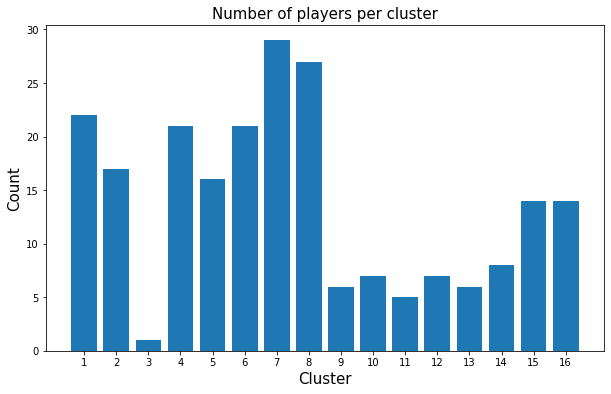

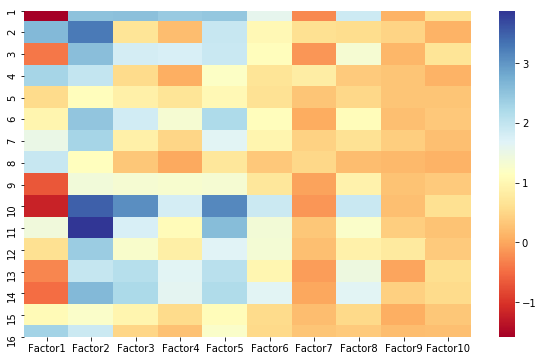

In [ ]:
if FLAG_adjust_clusters:
    adjust_clusters = {43 : 1,
                      11316 : 1,
                      11306 : 1,
                      11916 : 13,
                      12130 : 13,
                      11287 : 13,
                      168 : 13,
                      404 : 13,
                      12078 : 13,
                      801 : 14,
                      389 : 14,
                      178 : 14,
                      12671 : 14,
                      175 : 14,
                      11861 : 14,
                      484 : 14,
                      187 : 14,
                      26 : 15,
                      1309 : 15,
                      1007 : 15,
                      979 : 15,
                      97 : 15,
                      12282 : 15,
                      11317 : 15,
                      558 : 15,
                      62 : 15,
                      11304 : 15,
                      11371 : 15,
                      12506 : 15,
                      11913 : 15,
                      12615 : 15,
                      147 : 16,
                      11328 : 16,
                      1023 : 16,
                      12684 : 16,
                      11443 : 16,
                      577 : 16,
                      146 : 16,
                      341 : 16,
                      12361 : 16,
                      794 : 16,
                      12677 : 16,
                      11581 : 16,
                      445 : 16, 
                      12617 : 16}
    for id_pl,cl in adjust_clusters.items():
        X_parcoords['cluster'][X_parcoords['id'] == id_pl] = cl
    labels = X_parcoords['cluster']
    unique, counts = np.unique(labels, return_counts=True)
    # unique += 1
    plt.figure(figsize = (10,6))
    plt.bar(unique.astype(str), height=counts)
    # plt.hist(labels.astype(str))
    plt.xlabel('Cluster', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.title('Number of players per cluster', fontsize = 15)
    plt.savefig('hist_cluster.png')
    plt.show()
    clusters = np.sort(X_parcoords['cluster'].unique())
    nb_clusters = len(clusters)
    columns_factors = ['Factor' + str(k) for k in range(1,n_factors + 1)]
    means_clusters = pd.DataFrame([np.mean(X_parcoords.loc[X_parcoords['cluster']==k, columns_factors], axis = 0) for k in range(1,nb_clusters+1)])
    data_positions = pd.DataFrame({'position' :positions, 'cluster' : labels, 'nickname' : nicknames})
    data_count = data_positions.groupby(['cluster','position']).count()
    data_count = data_count.reset_index(drop=False)
    #calculate position percentage in each cluster
    for i in range(1,nb_clusters + 1):
        data_count['nickname'][data_count['cluster']==i] = data_count['nickname'][data_count['cluster']==i]/counts[i-1]
    %matplotlib inline
    plt.figure(figsize = (10,6))
    g = sns.heatmap(means_clusters, cmap = 'RdYlBu')
    g.set(yticklabels=np.arange(1,nb_clusters+1))
    plt.show()
else:
    clusters = range(1,nb_clusters+1)
        


In [ ]:
unique

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [ ]:
labels

0      15
1       7
2      10
3       8
4       1
       ..
253     6
254    10
256     6
257     2
258     8
Name: cluster, Length: 221, dtype: int64

In [ ]:
# for id_pl,cl in adjust_clusters.items():
#     X_parcoords['cluster'][X_parcoords['id'] == id_pl] = cl

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
for position in np.unique(positions):
    fig.add_trace(go.Bar(
        x=data_count['cluster'][data_count['position']==position],
        y=round(data_count['nickname'][data_count['position']==position],8),
        text=round(data_count['nickname'][data_count['position']==position],2),
        textposition='auto',
        name= names_positions[position]
    ))

fig.update_layout(barmode='stack',
                 title="Percentage of players in each position per cluster",
                 xaxis=dict(tickmode='linear'),
                 xaxis_title="Cluster",
                 yaxis_title="Positions percentage (%)",
                 legend_title="Position",
                 plot_bgcolor = 'white',
                 paper_bgcolor = 'white')
fig.show()
fig.write_image('percentage_positions_cluster.png')

In [ ]:
nb_clusters

16

In [ ]:
mean_height = [np.mean(height.astype(float)[labels==k], axis = 0) for k in range(1,nb_clusters+1)]
mean_weight = [np.mean(weight.astype(float)[labels==k], axis = 0) for k in range(1,nb_clusters+1)]

In [ ]:
mean_height

[2.0640908577272725,
 1.887058825882353,
 2.04999995,
 1.8680952447619048,
 1.9212499937499998,
 2.0419047199999993,
 1.9262068931034482,
 1.9074074166666672,
 2.0266666399999997,
 2.0842856671428573,
 1.9859999900000003,
 1.9742857057142855,
 2.041666625,
 2.0574999425000002,
 1.9557142857142857,
 1.9328571492857143]

In [ ]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# fig = go.Figure()
fig.add_trace(go.Bar(
    x=np.unique(labels),
    y=mean_height,
#         text=round(data_count['nickname'][data_count['position']==position],2),
#     textposition='auto',
    name= 'Height',
    offsetgroup=1
),
secondary_y=False)

fig.add_trace(go.Bar(
    x=np.unique(labels),
    y=mean_weight,
#         text=round(data_count['nickname'][data_count['position']==position],2),
#     textposition='auto',
    name= 'Weight',
    offsetgroup=2
),
secondary_y=True)

fig.update_layout(barmode='group',
                 title="Mean height and weight per cluster",
                 xaxis=dict(tickmode='linear'),
                 xaxis_title="Cluster",
                 legend_title="Value",
                 plot_bgcolor = 'white',
                 paper_bgcolor = 'white',
                 yaxis=dict(
                    title="Height",
                     range=[1.70, 2.20]),
                 yaxis2=dict(
                    title="Weight",
                 range=[75, 120]))
fig.show()
fig.write_image('height_weight.png')

In [ ]:
# clusters = np.sort(X_parcoords['cluster'].unique())
# nb_clusters = len(clusters)

In [ ]:
if FLAG_write:
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    writer = pd.ExcelWriter('cluster_analysis_NBB.xlsx', engine='xlsxwriter')

    df_loads = pd.DataFrame(loads, index = x.columns.values, \
                             columns = ['Factor'+str(k) for k in range(1,np.shape(fa.get_factor_variance())[1]+1)])
    df_loads.to_excel(writer, sheet_name='Fatores', float_format="%.2f", freeze_panes = (1,1))
    means_cluster_copy = means_clusters.copy()
    means_cluster_copy.insert(0,'cluster',np.arange(1,nb_clusters+1))
    means_cluster_copy.set_index('cluster', drop = True, inplace = True)
    means_cluster_copy.to_excel(writer, sheet_name='Médias', float_format="%.2f", freeze_panes = (1,1))

    df_stats_pop = 40*vars_avg[~pl_outliers_bool].loc[:,x.columns.values]
    df_factor_stats_pop = pd.concat([X_parcoords,df_stats_pop], axis = 1)
    df_factor_stats_pop['cluster'] = df_factor_stats_pop['cluster'].astype(str)
    df_factor_stats_pop.sort_values(['TJL_score','T_quartile','J_quartile','L_quartile'], ascending=False, inplace=True)
    df_factor_stats_pop.loc['median_pop'] = df_factor_stats_pop.median(numeric_only=True)
    df_factor_stats_pop['cluster'].loc[~df_factor_stats_pop.index.isin(['median_pop'])] = \
        df_factor_stats_pop['cluster'].loc[~df_factor_stats_pop.index.isin(['median_pop'])].astype(int)
    df_factor_stats_pop = df_factor_stats_pop.drop('position', axis = 1)
    # Write each dataframe to a different worksheet.
    for cluster in clusters:
        df = X_parcoords[X_parcoords['cluster'] == cluster]
        df = df.drop('position', axis = 1)
        df['cluster'] = df['cluster'].astype(str)
        df_stats = df_stats_pop[X_parcoords['cluster'] == cluster]
        df.insert(np.shape(df)[1],'LE',entr_[X_parcoords['cluster'] == cluster])
        df = pd.concat([df,df_stats], axis = 1)
        df.sort_values(['TJL_score','T_quartile','J_quartile','L_quartile'], ascending=False, inplace=True)
        df.loc['median_cluster'] = df.median(numeric_only=True)
        df.loc['median_pop'] = df_factor_stats_pop.median(numeric_only=True)
        df['cluster'].loc[~df.index.isin(['median_cluster','median_pop'])] = df['cluster'].loc[~df.index.isin(['median_cluster',\
                                                                               'median_pop'])].astype(int)
        df.to_excel(writer, sheet_name='Cluster' + str(cluster), index=True, float_format="%.2f", freeze_panes = (1,0))
        workbook  = writer.book
        worksheet = writer.sheets['Cluster' + str(cluster)]
        # Insert an image.
        worksheet.insert_image('O' + str(np.shape(df)[0] + 2), 'rodape_FLA_PUC_SportsAI.png',\
                          {'x_scale': 0.80,'y_scale': 0.80})

    df_factor_stats_pop.to_excel(writer, sheet_name='All_players', index=True, float_format="%.2f")
    entr_quantiles.to_excel(writer, sheet_name='Entropy_quantiles', index=True, float_format="%.2f")
    # Get the xlsxwriter workbook and worksheet objects.
    workbook  = writer.book
    worksheet = writer.sheets['Fatores']
    worksheet.insert_image('K55', 'rodape_FLA_PUC_SportsAI.png',\
                          {'x_scale': 0.80,'y_scale': 0.80})
    worksheet = writer.sheets['Médias']
    # Insert an image.
    worksheet.insert_image('A' + str(np.shape(means_cluster_copy)[0] + 2), 'hist_cluster.png',\
                          {'x_scale': 0.50,'y_scale': 0.50})
    worksheet.insert_image('I' + str(np.shape(means_cluster_copy)[0] + 2), 'percentage_positions_cluster.png',\
                          {'x_scale': 0.65,'y_scale': 0.65})
    worksheet.insert_image('Q' + str(np.shape(means_cluster_copy)[0] + 2), 'height_weight.png',\
                          {'x_scale': 0.70,'y_scale': 0.70})
    worksheet.insert_image('K' + str(np.shape(means_cluster_copy)[0] + 20), 'rodape_FLA_PUC_SportsAI.png',\
                          {'x_scale': 0.80,'y_scale': 0.80})

    # Close the Pandas Excel writer and output the Excel file.
    writer.save()

C:\Users\Pedro R. Suanno\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Write file to train Decision Tree for clustering

In [ ]:
columns_DT = ['Factor' + str(k) for k in range(1,n_factors + 1)]
columns_DT.insert(0,'cluster')
data_DT = X_parcoords.loc[:,columns_DT]
data_DT.to_csv('data_decision_tree.csv')